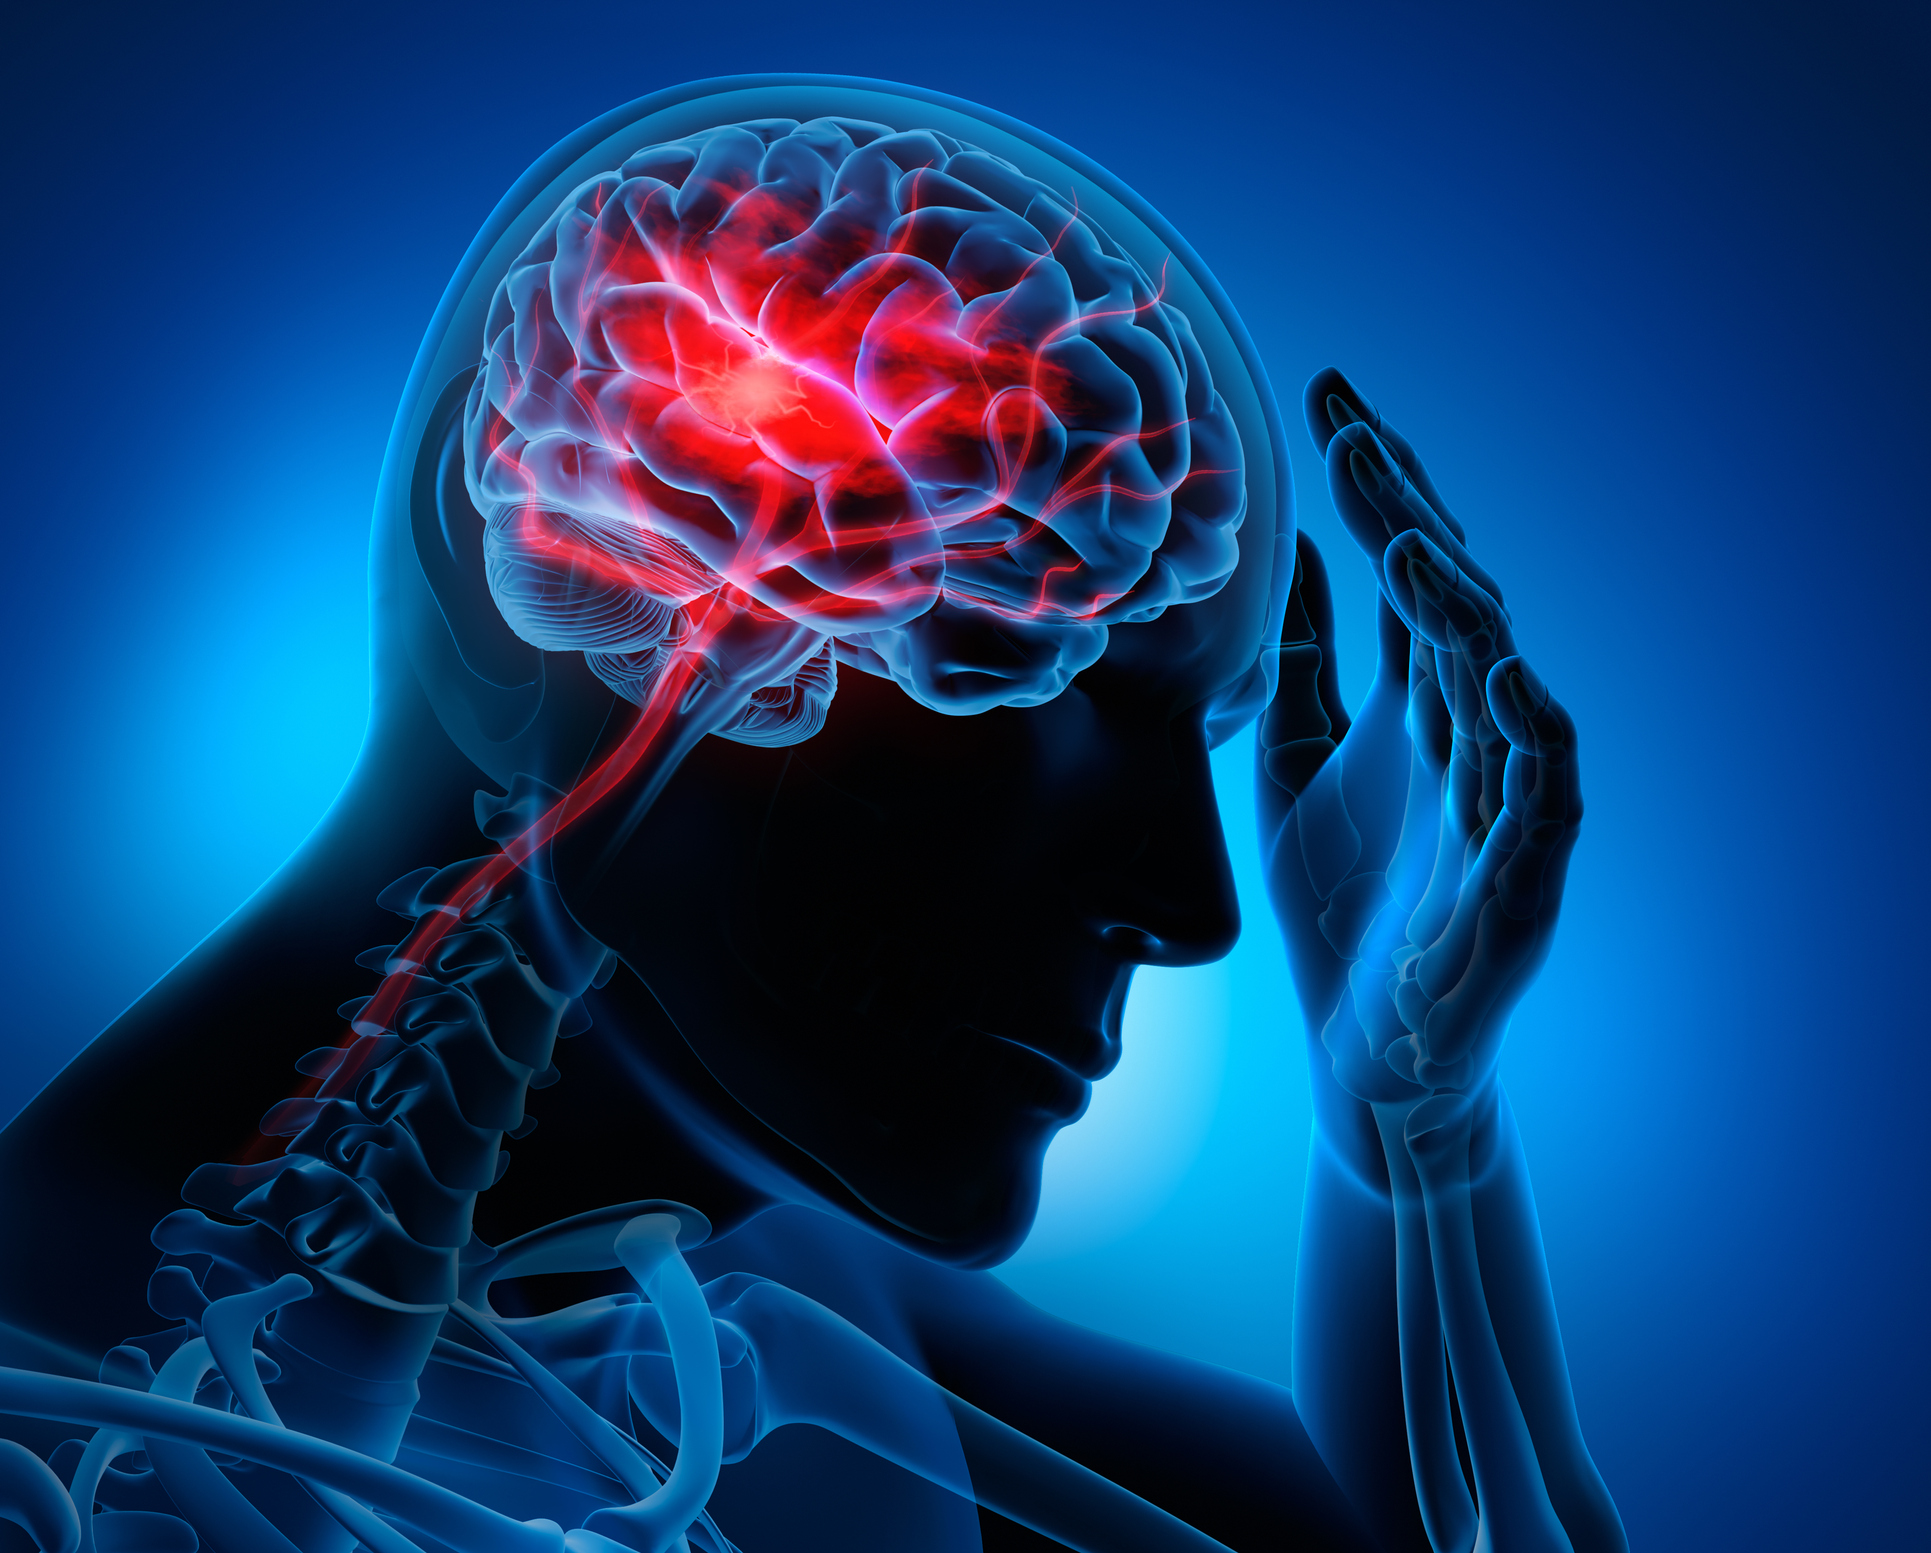

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate ,RandomizedSearchCV ,validation_curve
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy.stats import ttest_1samp , shapiro , levene , ttest_ind ,mannwhitneyu ,pearsonr,spearmanr,kendalltau,f_oneway,kruskal

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
        roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
data = pd.read_csv("C:/Users/can/Desktop/healthcare-dataset-stroke-data.csv")

In [3]:
df = data.copy()

In [4]:
df.shape

(5110, 12)

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


In [6]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.000,1,0,Yes,Private,Urban,83.750,NaN,never smoked,0
5106,44873,Female,81.000,0,0,Yes,Self-employed,Urban,125.200,40.000,never smoked,0
5107,19723,Female,35.000,0,0,Yes,Self-employed,Rural,82.990,30.600,never smoked,0
5108,37544,Male,51.000,0,0,Yes,Private,Rural,166.290,25.600,formerly smoked,0
5109,44679,Female,44.000,0,0,Yes,Govt_job,Urban,85.280,26.200,Unknown,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df['age'] = df['age'].astype('int')

In [9]:
cat_cols = [col for col in df.columns if df[col].dtypes == "object"]
num_cols = [col for col in df.columns if col not in cat_cols]

cat_cols, num_cols = cat_cols, num_cols

<br>

### Kategorik Analiz

         Female     Male  Other
gender 2994.000 2115.000  1.000
gender   58.591   41.389  0.020


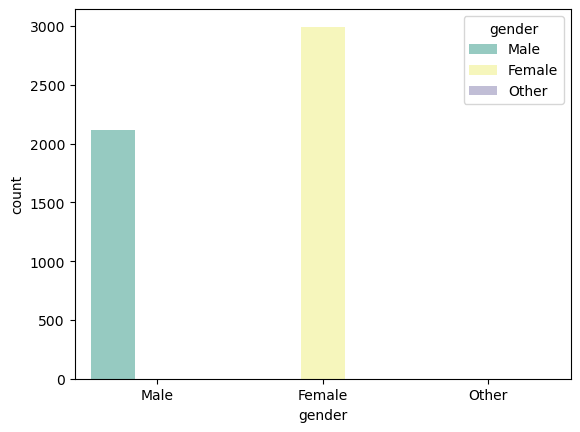

                  Yes       No
ever_married 3353.000 1757.000
ever_married   65.616   34.384


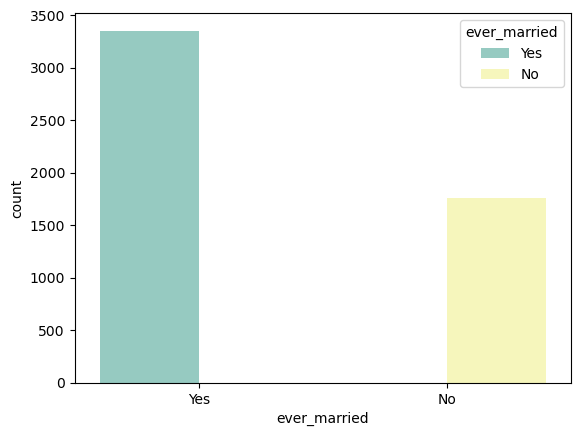

           Private  Self-employed  children  Govt_job  Never_worked
work_type 2925.000        819.000   687.000   657.000        22.000
work_type   57.241         16.027    13.444    12.857         0.431


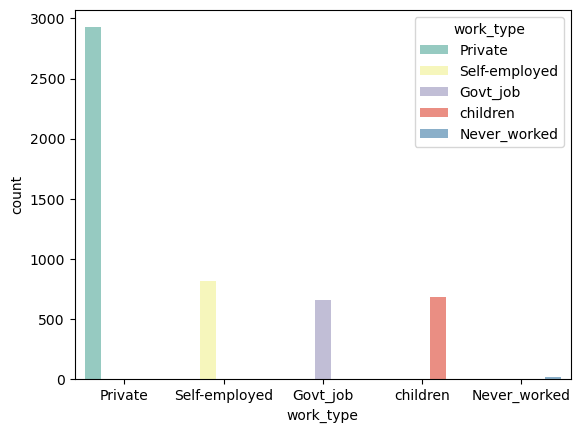

                  Urban    Rural
Residence_type 2596.000 2514.000
Residence_type   50.802   49.198


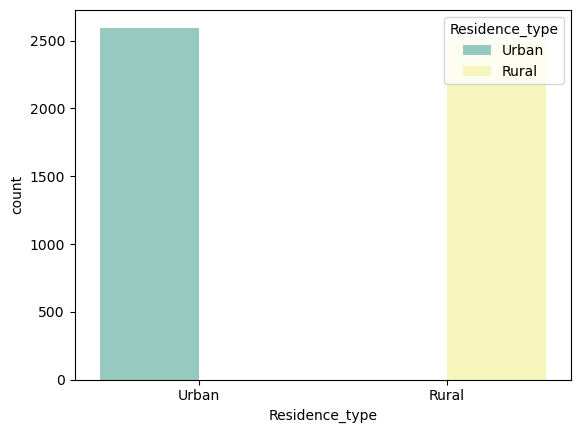

                never smoked  Unknown  formerly smoked  smokes
smoking_status      1892.000 1544.000          885.000 789.000
smoking_status        37.025   30.215           17.319  15.440


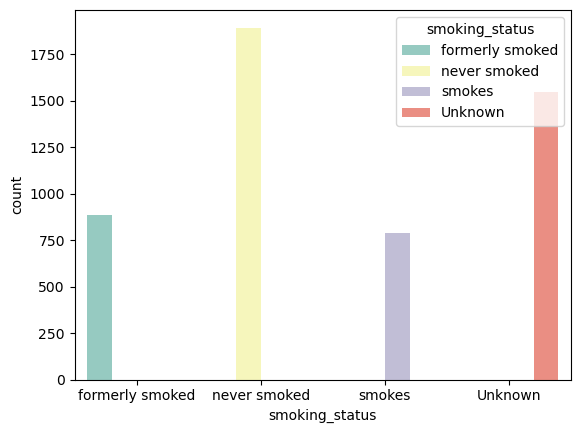

In [10]:
def kategorik_analiz(dataframe,col_name, pieplot = False ,countplot=True):
    print(pd.DataFrame((dataframe[col_name].value_counts(),dataframe[col_name].value_counts(normalize=True)*100)))
    
    if countplot:

        sns.countplot(x=df[col_name], hue=df[col_name], data=dataframe,palette="Set3")
        plt.legend(title = col_name)
        plt.show()
        
    if pieplot:
        labels = df[col_name].value_counts().index
        my_colors = ["g", "y", "#ff9999"]
        plt.pie(df[col_name].value_counts(),labels=labels,colors=my_colors,autopct='%.0f%%')
        plt.legend(title = col_name)
        plt.show()        
        
        
for col in cat_cols:
    kategorik_analiz(df,col)

In [11]:
df.drop(df[df.gender == "Other"].index[0],axis=0,inplace=True)


### One Hot Encoding

In [12]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [13]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
ohe_cols

['work_type', 'smoking_status']

In [14]:
df = one_hot_encoder(df, ohe_cols, drop_first=True)

### Label Encoding

In [15]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender', 'ever_married', 'Residence_type']

In [16]:
for col in binary_cols:
    df = label_encoder(df, col)

### Eksik değerleri doldurduk

In [17]:
def missing_values_table(dataframe,na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum()/dataframe.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=["n_miss","ratio"])
    print(missing_df,end="\n")
    if na_name:
        return na_columns

missing_values_table(df,na_name=True)


     n_miss  ratio
bmi     201  3.930


['bmi']

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


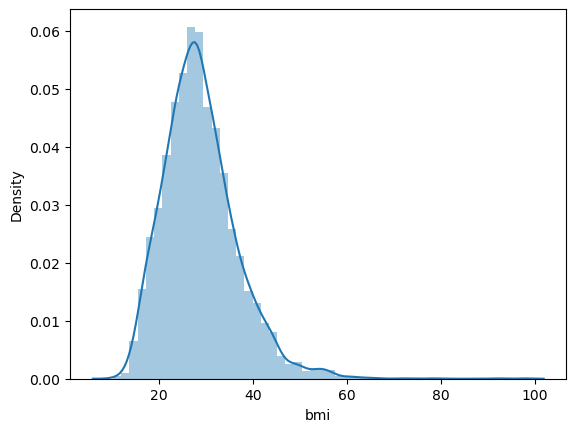

In [18]:
sns.distplot(df["bmi"])
plt.show()

### Bmi değişkeni normal dağılımlıdır. Bundan dolayı median ile doldurulamaz . KNN ile dolduracağız

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [20]:
dff = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df["bmi"] = dff[["bmi"]]

In [21]:
df.dropna(inplace=True)

<br>

### Aykırı değer sorguladık

In [22]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [23]:
for col in num_cols:
    print(col, check_outlier(df, col))

id False
age False
hypertension False
heart_disease False
avg_glucose_level False
bmi True
stroke True


<br>

### Numerik Değişken Analizi

count    5108.000
mean    36512.387
std     21163.772
min        67.000
5%       3590.350
10%      6971.500
20%     14153.800
30%     21967.200
40%     29347.000
50%     36915.500
60%     44317.000
70%     51123.200
80%     58153.600
90%     65668.800
max     72940.000
Name: id, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


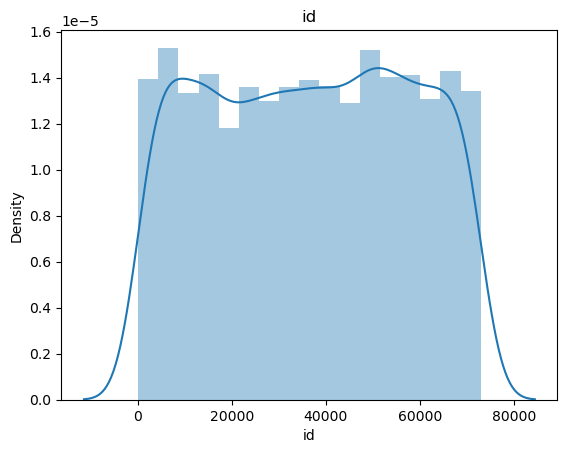

count   5108.000
mean      43.218
std       22.637
min        0.000
5%         5.000
10%       11.000
20%       20.000
30%       30.000
40%       38.000
50%       45.000
60%       51.000
70%       57.000
80%       65.000
90%       75.000
max       82.000
Name: age, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


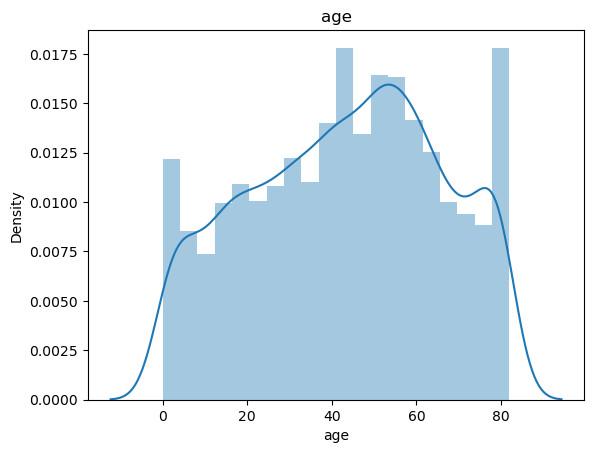

count   5108.000
mean       0.097
std        0.297
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
max        1.000
Name: hypertension, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


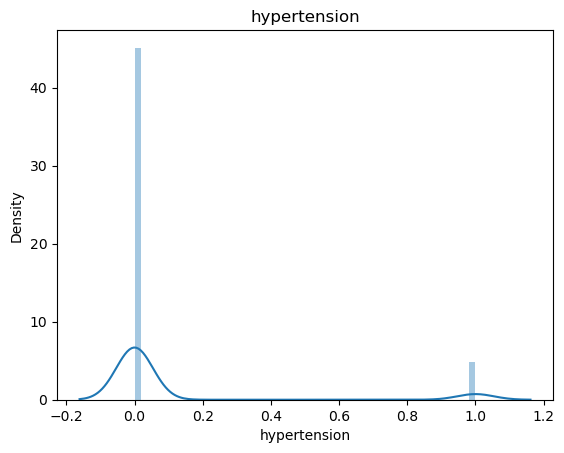

count   5108.000
mean       0.054
std        0.226
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
max        1.000
Name: heart_disease, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


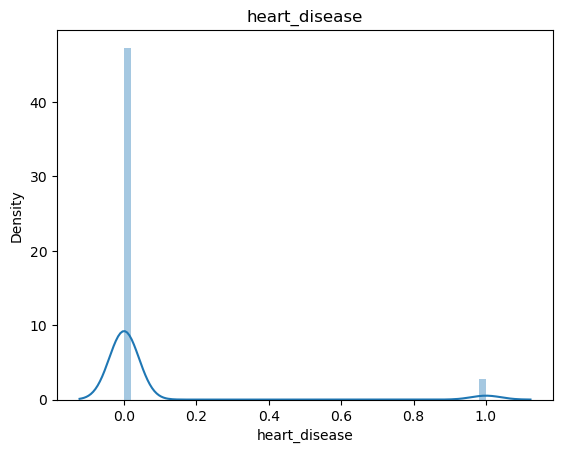

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count   5108.000
mean     106.144
std       45.288
min       55.120
5%        60.711
10%       65.787
20%       73.760
30%       80.014
40%       85.600
50%       91.885
60%       98.912
70%      108.510
80%      124.148
90%      192.223
max      271.740
Name: avg_glucose_level, dtype: float64


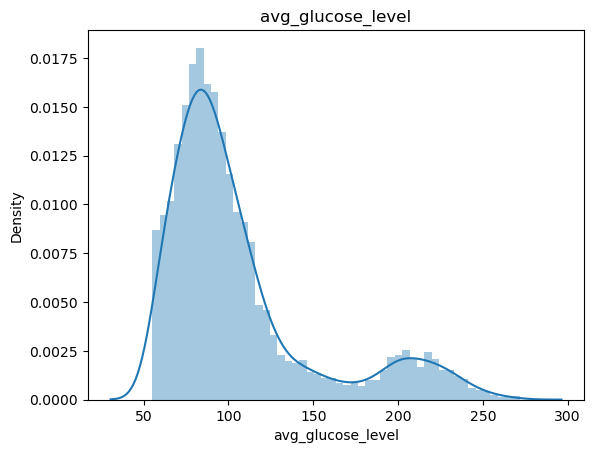

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count   5108.000
mean      28.937
std        7.739
min       10.300
5%        17.700
10%       19.900
20%       22.700
30%       24.700
40%       26.500
50%       28.200
60%       29.800
70%       31.900
80%       34.440
90%       38.800
max       97.600
Name: bmi, dtype: float64


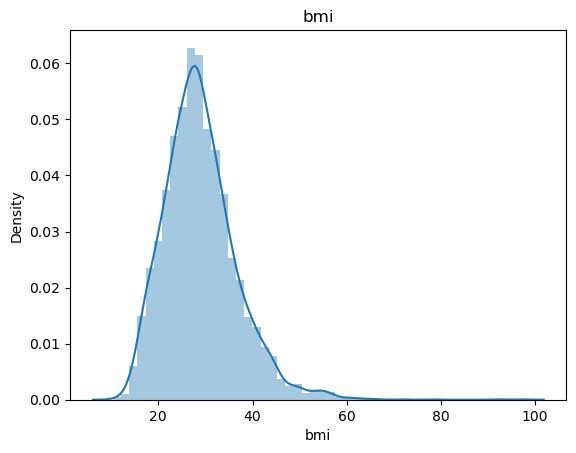

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count   5108.000
mean       0.049
std        0.215
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
max        1.000
Name: stroke, dtype: float64


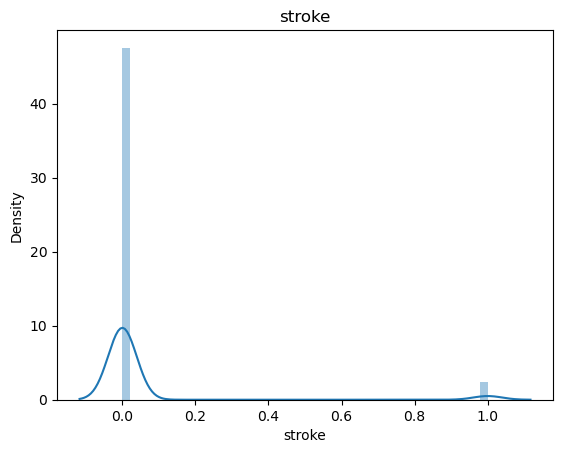

In [24]:
def num_summary(dataframe,num_col,plot=False):
    quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        #dataframe[num_col].hist()
        sns.distplot(dataframe[num_col])
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col ,plot=True)

<br>

## Modelleme

In [25]:
X = df.drop("stroke",axis=1)
y = df["stroke"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)


In [27]:
all_models = []

In [28]:
models = [
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGB', XGBClassifier()),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier())]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "precision", "recall"])
    accuracy = cv_results['test_accuracy'].mean()
    recall = cv_results['test_recall'].mean()
    precision = cv_results['test_precision'].mean()
    f1 = cv_results['test_f1'].mean()
    values = dict(name=name, Accuracy=accuracy, Recall=recall,Precision=precision,F1 = f1 )
    all_models.append(values)
    sort_method = False
    all_models_df = pd.DataFrame(all_models)
    all_models_df = all_models_df.sort_values(all_models_df.columns[1], ascending=sort_method)


C:\Users\can\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\can\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\can\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\can\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-d

Learning rate set to 0.019761
0:	learn: 0.6572562	total: 159ms	remaining: 2m 38s
1:	learn: 0.6266587	total: 161ms	remaining: 1m 20s
2:	learn: 0.6007320	total: 162ms	remaining: 53.9s
3:	learn: 0.5790894	total: 164ms	remaining: 40.8s
4:	learn: 0.5558657	total: 165ms	remaining: 32.9s
5:	learn: 0.5324151	total: 167ms	remaining: 27.6s
6:	learn: 0.5094623	total: 168ms	remaining: 23.9s
7:	learn: 0.4903461	total: 170ms	remaining: 21.1s
8:	learn: 0.4735299	total: 172ms	remaining: 18.9s
9:	learn: 0.4530647	total: 173ms	remaining: 17.2s
10:	learn: 0.4365038	total: 175ms	remaining: 15.7s
11:	learn: 0.4188310	total: 176ms	remaining: 14.5s
12:	learn: 0.4056771	total: 178ms	remaining: 13.5s
13:	learn: 0.3910386	total: 180ms	remaining: 12.7s
14:	learn: 0.3764633	total: 181ms	remaining: 11.9s
15:	learn: 0.3657090	total: 190ms	remaining: 11.7s
16:	learn: 0.3525062	total: 191ms	remaining: 11.1s
17:	learn: 0.3432346	total: 193ms	remaining: 10.5s
18:	learn: 0.3336459	total: 194ms	remaining: 10s
19:	learn: 

203:	learn: 0.1270932	total: 605ms	remaining: 2.36s
204:	learn: 0.1269555	total: 606ms	remaining: 2.35s
205:	learn: 0.1267747	total: 608ms	remaining: 2.34s
206:	learn: 0.1266113	total: 610ms	remaining: 2.34s
207:	learn: 0.1265523	total: 612ms	remaining: 2.33s
208:	learn: 0.1264359	total: 613ms	remaining: 2.32s
209:	learn: 0.1262986	total: 615ms	remaining: 2.31s
210:	learn: 0.1261485	total: 617ms	remaining: 2.31s
211:	learn: 0.1260025	total: 619ms	remaining: 2.3s
212:	learn: 0.1258603	total: 621ms	remaining: 2.29s
213:	learn: 0.1257014	total: 623ms	remaining: 2.29s
214:	learn: 0.1255550	total: 624ms	remaining: 2.28s
215:	learn: 0.1254218	total: 626ms	remaining: 2.27s
216:	learn: 0.1252851	total: 628ms	remaining: 2.27s
217:	learn: 0.1251234	total: 630ms	remaining: 2.26s
218:	learn: 0.1249787	total: 631ms	remaining: 2.25s
219:	learn: 0.1248965	total: 633ms	remaining: 2.24s
220:	learn: 0.1247596	total: 635ms	remaining: 2.24s
221:	learn: 0.1246079	total: 637ms	remaining: 2.23s
222:	learn: 0

404:	learn: 0.1036389	total: 1.01s	remaining: 1.49s
405:	learn: 0.1035175	total: 1.02s	remaining: 1.49s
406:	learn: 0.1034633	total: 1.02s	remaining: 1.49s
407:	learn: 0.1033442	total: 1.02s	remaining: 1.48s
408:	learn: 0.1032207	total: 1.02s	remaining: 1.48s
409:	learn: 0.1031472	total: 1.02s	remaining: 1.48s
410:	learn: 0.1029963	total: 1.03s	remaining: 1.47s
411:	learn: 0.1028806	total: 1.03s	remaining: 1.47s
412:	learn: 0.1027719	total: 1.03s	remaining: 1.47s
413:	learn: 0.1027308	total: 1.03s	remaining: 1.46s
414:	learn: 0.1025631	total: 1.03s	remaining: 1.46s
415:	learn: 0.1024874	total: 1.04s	remaining: 1.46s
416:	learn: 0.1024125	total: 1.04s	remaining: 1.45s
417:	learn: 0.1022920	total: 1.04s	remaining: 1.45s
418:	learn: 0.1021906	total: 1.04s	remaining: 1.44s
419:	learn: 0.1020415	total: 1.04s	remaining: 1.44s
420:	learn: 0.1018874	total: 1.04s	remaining: 1.44s
421:	learn: 0.1018042	total: 1.05s	remaining: 1.43s
422:	learn: 0.1017410	total: 1.05s	remaining: 1.43s
423:	learn: 

574:	learn: 0.0889155	total: 1.43s	remaining: 1.06s
575:	learn: 0.0888352	total: 1.43s	remaining: 1.06s
576:	learn: 0.0887256	total: 1.44s	remaining: 1.05s
577:	learn: 0.0886585	total: 1.44s	remaining: 1.05s
578:	learn: 0.0885791	total: 1.44s	remaining: 1.05s
579:	learn: 0.0885219	total: 1.44s	remaining: 1.04s
580:	learn: 0.0884359	total: 1.44s	remaining: 1.04s
581:	learn: 0.0883649	total: 1.45s	remaining: 1.04s
582:	learn: 0.0882778	total: 1.45s	remaining: 1.03s
583:	learn: 0.0881961	total: 1.45s	remaining: 1.03s
584:	learn: 0.0880895	total: 1.45s	remaining: 1.03s
585:	learn: 0.0880506	total: 1.45s	remaining: 1.03s
586:	learn: 0.0880112	total: 1.45s	remaining: 1.02s
587:	learn: 0.0879458	total: 1.46s	remaining: 1.02s
588:	learn: 0.0878530	total: 1.46s	remaining: 1.02s
589:	learn: 0.0877655	total: 1.46s	remaining: 1.01s
590:	learn: 0.0876928	total: 1.46s	remaining: 1.01s
591:	learn: 0.0875974	total: 1.46s	remaining: 1.01s
592:	learn: 0.0875215	total: 1.46s	remaining: 1s
593:	learn: 0.0

759:	learn: 0.0770275	total: 1.84s	remaining: 583ms
760:	learn: 0.0769838	total: 1.85s	remaining: 580ms
761:	learn: 0.0769379	total: 1.85s	remaining: 577ms
762:	learn: 0.0768965	total: 1.85s	remaining: 575ms
763:	learn: 0.0768318	total: 1.85s	remaining: 572ms
764:	learn: 0.0767893	total: 1.85s	remaining: 570ms
765:	learn: 0.0767348	total: 1.85s	remaining: 567ms
766:	learn: 0.0766710	total: 1.86s	remaining: 564ms
767:	learn: 0.0766407	total: 1.86s	remaining: 562ms
768:	learn: 0.0765405	total: 1.86s	remaining: 559ms
769:	learn: 0.0764404	total: 1.86s	remaining: 556ms
770:	learn: 0.0764190	total: 1.86s	remaining: 554ms
771:	learn: 0.0763902	total: 1.87s	remaining: 551ms
772:	learn: 0.0763096	total: 1.87s	remaining: 549ms
773:	learn: 0.0762822	total: 1.87s	remaining: 546ms
774:	learn: 0.0762126	total: 1.87s	remaining: 543ms
775:	learn: 0.0761203	total: 1.87s	remaining: 541ms
776:	learn: 0.0760561	total: 1.88s	remaining: 538ms
777:	learn: 0.0759872	total: 1.88s	remaining: 536ms
778:	learn: 

Learning rate set to 0.019761
0:	learn: 0.6571590	total: 1.74ms	remaining: 1.73s
1:	learn: 0.6261372	total: 3.46ms	remaining: 1.73s
2:	learn: 0.6000889	total: 5.18ms	remaining: 1.72s
3:	learn: 0.5785089	total: 7.05ms	remaining: 1.76s
4:	learn: 0.5551777	total: 8.71ms	remaining: 1.73s
5:	learn: 0.5309236	total: 10.4ms	remaining: 1.73s
6:	learn: 0.5091414	total: 12.1ms	remaining: 1.72s
7:	learn: 0.4867180	total: 13.9ms	remaining: 1.72s
8:	learn: 0.4702479	total: 15.6ms	remaining: 1.72s
9:	learn: 0.4487203	total: 17.3ms	remaining: 1.71s
10:	learn: 0.4349795	total: 18.4ms	remaining: 1.66s
11:	learn: 0.4182007	total: 20.1ms	remaining: 1.65s
12:	learn: 0.4062008	total: 21.2ms	remaining: 1.61s
13:	learn: 0.3941510	total: 22.9ms	remaining: 1.61s
14:	learn: 0.3808537	total: 24.6ms	remaining: 1.62s
15:	learn: 0.3678213	total: 26.3ms	remaining: 1.62s
16:	learn: 0.3550918	total: 28ms	remaining: 1.62s
17:	learn: 0.3446964	total: 29.7ms	remaining: 1.62s
18:	learn: 0.3355073	total: 31.4ms	remaining: 

165:	learn: 0.1323958	total: 403ms	remaining: 2.02s
166:	learn: 0.1322837	total: 404ms	remaining: 2.02s
167:	learn: 0.1320862	total: 406ms	remaining: 2.01s
168:	learn: 0.1319461	total: 408ms	remaining: 2.01s
169:	learn: 0.1317109	total: 410ms	remaining: 2s
170:	learn: 0.1316093	total: 412ms	remaining: 2s
171:	learn: 0.1314014	total: 414ms	remaining: 1.99s
172:	learn: 0.1312783	total: 416ms	remaining: 1.99s
173:	learn: 0.1311285	total: 418ms	remaining: 1.98s
174:	learn: 0.1309895	total: 420ms	remaining: 1.98s
175:	learn: 0.1308243	total: 421ms	remaining: 1.97s
176:	learn: 0.1305646	total: 423ms	remaining: 1.97s
177:	learn: 0.1303728	total: 425ms	remaining: 1.96s
178:	learn: 0.1302347	total: 427ms	remaining: 1.96s
179:	learn: 0.1300834	total: 428ms	remaining: 1.95s
180:	learn: 0.1299614	total: 450ms	remaining: 2.04s
181:	learn: 0.1298353	total: 452ms	remaining: 2.03s
182:	learn: 0.1296060	total: 453ms	remaining: 2.02s
183:	learn: 0.1293567	total: 455ms	remaining: 2.02s
184:	learn: 0.1291

350:	learn: 0.1092002	total: 818ms	remaining: 1.51s
351:	learn: 0.1091016	total: 820ms	remaining: 1.51s
352:	learn: 0.1089541	total: 822ms	remaining: 1.51s
353:	learn: 0.1088328	total: 824ms	remaining: 1.5s
354:	learn: 0.1086954	total: 825ms	remaining: 1.5s
355:	learn: 0.1086259	total: 827ms	remaining: 1.5s
356:	learn: 0.1084963	total: 829ms	remaining: 1.49s
357:	learn: 0.1083904	total: 831ms	remaining: 1.49s
358:	learn: 0.1082489	total: 832ms	remaining: 1.49s
359:	learn: 0.1081331	total: 834ms	remaining: 1.48s
360:	learn: 0.1080232	total: 836ms	remaining: 1.48s
361:	learn: 0.1079380	total: 838ms	remaining: 1.48s
362:	learn: 0.1078785	total: 840ms	remaining: 1.47s
363:	learn: 0.1078063	total: 841ms	remaining: 1.47s
364:	learn: 0.1076952	total: 849ms	remaining: 1.48s
365:	learn: 0.1075663	total: 851ms	remaining: 1.47s
366:	learn: 0.1075161	total: 852ms	remaining: 1.47s
367:	learn: 0.1074423	total: 854ms	remaining: 1.47s
368:	learn: 0.1073722	total: 856ms	remaining: 1.46s
369:	learn: 0.1

537:	learn: 0.0921517	total: 1.22s	remaining: 1.04s
538:	learn: 0.0920738	total: 1.22s	remaining: 1.04s
539:	learn: 0.0920078	total: 1.22s	remaining: 1.04s
540:	learn: 0.0919077	total: 1.22s	remaining: 1.04s
541:	learn: 0.0917727	total: 1.22s	remaining: 1.03s
542:	learn: 0.0916506	total: 1.22s	remaining: 1.03s
543:	learn: 0.0916062	total: 1.23s	remaining: 1.03s
544:	learn: 0.0915049	total: 1.23s	remaining: 1.02s
545:	learn: 0.0914798	total: 1.24s	remaining: 1.03s
546:	learn: 0.0913736	total: 1.24s	remaining: 1.03s
547:	learn: 0.0913132	total: 1.24s	remaining: 1.02s
548:	learn: 0.0912937	total: 1.24s	remaining: 1.02s
549:	learn: 0.0912174	total: 1.24s	remaining: 1.02s
550:	learn: 0.0911902	total: 1.25s	remaining: 1.01s
551:	learn: 0.0910914	total: 1.25s	remaining: 1.01s
552:	learn: 0.0910167	total: 1.25s	remaining: 1.01s
553:	learn: 0.0909513	total: 1.25s	remaining: 1.01s
554:	learn: 0.0908320	total: 1.25s	remaining: 1s
555:	learn: 0.0907593	total: 1.25s	remaining: 1s
556:	learn: 0.0906

700:	learn: 0.0807751	total: 1.62s	remaining: 690ms
701:	learn: 0.0806798	total: 1.62s	remaining: 688ms
702:	learn: 0.0805929	total: 1.62s	remaining: 685ms
703:	learn: 0.0805420	total: 1.62s	remaining: 683ms
704:	learn: 0.0804809	total: 1.63s	remaining: 680ms
705:	learn: 0.0804289	total: 1.63s	remaining: 678ms
706:	learn: 0.0803708	total: 1.63s	remaining: 675ms
707:	learn: 0.0802877	total: 1.63s	remaining: 673ms
708:	learn: 0.0802180	total: 1.63s	remaining: 670ms
709:	learn: 0.0801387	total: 1.63s	remaining: 668ms
710:	learn: 0.0800615	total: 1.64s	remaining: 665ms
711:	learn: 0.0799718	total: 1.64s	remaining: 663ms
712:	learn: 0.0798950	total: 1.64s	remaining: 660ms
713:	learn: 0.0798117	total: 1.64s	remaining: 658ms
714:	learn: 0.0797475	total: 1.64s	remaining: 655ms
715:	learn: 0.0796821	total: 1.65s	remaining: 653ms
716:	learn: 0.0795957	total: 1.65s	remaining: 650ms
717:	learn: 0.0795328	total: 1.65s	remaining: 648ms
718:	learn: 0.0795202	total: 1.65s	remaining: 646ms
719:	learn: 

876:	learn: 0.0699001	total: 2.02s	remaining: 283ms
877:	learn: 0.0698030	total: 2.02s	remaining: 280ms
878:	learn: 0.0697568	total: 2.02s	remaining: 278ms
879:	learn: 0.0696939	total: 2.02s	remaining: 276ms
880:	learn: 0.0696359	total: 2.02s	remaining: 273ms
881:	learn: 0.0695796	total: 2.02s	remaining: 271ms
882:	learn: 0.0695342	total: 2.03s	remaining: 269ms
883:	learn: 0.0694820	total: 2.03s	remaining: 266ms
884:	learn: 0.0694324	total: 2.03s	remaining: 264ms
885:	learn: 0.0694204	total: 2.03s	remaining: 261ms
886:	learn: 0.0693565	total: 2.03s	remaining: 259ms
887:	learn: 0.0693400	total: 2.04s	remaining: 257ms
888:	learn: 0.0693205	total: 2.04s	remaining: 254ms
889:	learn: 0.0692830	total: 2.04s	remaining: 252ms
890:	learn: 0.0692160	total: 2.04s	remaining: 250ms
891:	learn: 0.0691715	total: 2.04s	remaining: 247ms
892:	learn: 0.0691255	total: 2.04s	remaining: 245ms
893:	learn: 0.0690824	total: 2.05s	remaining: 243ms
894:	learn: 0.0690225	total: 2.05s	remaining: 240ms
895:	learn: 

75:	learn: 0.1611083	total: 126ms	remaining: 1.53s
76:	learn: 0.1601477	total: 128ms	remaining: 1.53s
77:	learn: 0.1596827	total: 129ms	remaining: 1.53s
78:	learn: 0.1590555	total: 131ms	remaining: 1.53s
79:	learn: 0.1582349	total: 133ms	remaining: 1.53s
80:	learn: 0.1576937	total: 135ms	remaining: 1.53s
81:	learn: 0.1569025	total: 137ms	remaining: 1.53s
82:	learn: 0.1564363	total: 138ms	remaining: 1.53s
83:	learn: 0.1559305	total: 140ms	remaining: 1.53s
84:	learn: 0.1552493	total: 142ms	remaining: 1.53s
85:	learn: 0.1546365	total: 144ms	remaining: 1.52s
86:	learn: 0.1542574	total: 145ms	remaining: 1.52s
87:	learn: 0.1536735	total: 147ms	remaining: 1.52s
88:	learn: 0.1531450	total: 149ms	remaining: 1.52s
89:	learn: 0.1527054	total: 151ms	remaining: 1.52s
90:	learn: 0.1520430	total: 152ms	remaining: 1.52s
91:	learn: 0.1516496	total: 154ms	remaining: 1.52s
92:	learn: 0.1512799	total: 156ms	remaining: 1.52s
93:	learn: 0.1510203	total: 158ms	remaining: 1.52s
94:	learn: 0.1508417	total: 159

275:	learn: 0.1181967	total: 524ms	remaining: 1.37s
276:	learn: 0.1181145	total: 526ms	remaining: 1.37s
277:	learn: 0.1180393	total: 527ms	remaining: 1.37s
278:	learn: 0.1179521	total: 529ms	remaining: 1.37s
279:	learn: 0.1177845	total: 531ms	remaining: 1.36s
280:	learn: 0.1177057	total: 533ms	remaining: 1.36s
281:	learn: 0.1175793	total: 534ms	remaining: 1.36s
282:	learn: 0.1174592	total: 536ms	remaining: 1.36s
283:	learn: 0.1173614	total: 538ms	remaining: 1.36s
284:	learn: 0.1172949	total: 555ms	remaining: 1.39s
285:	learn: 0.1171779	total: 557ms	remaining: 1.39s
286:	learn: 0.1170473	total: 559ms	remaining: 1.39s
287:	learn: 0.1169728	total: 561ms	remaining: 1.39s
288:	learn: 0.1168169	total: 563ms	remaining: 1.38s
289:	learn: 0.1167612	total: 564ms	remaining: 1.38s
290:	learn: 0.1167030	total: 566ms	remaining: 1.38s
291:	learn: 0.1165904	total: 568ms	remaining: 1.38s
292:	learn: 0.1165395	total: 569ms	remaining: 1.37s
293:	learn: 0.1164895	total: 571ms	remaining: 1.37s
294:	learn: 

462:	learn: 0.0995636	total: 919ms	remaining: 1.06s
463:	learn: 0.0994950	total: 921ms	remaining: 1.06s
464:	learn: 0.0994642	total: 923ms	remaining: 1.06s
465:	learn: 0.0994184	total: 924ms	remaining: 1.06s
466:	learn: 0.0992756	total: 926ms	remaining: 1.06s
467:	learn: 0.0991510	total: 928ms	remaining: 1.05s
468:	learn: 0.0990561	total: 930ms	remaining: 1.05s
469:	learn: 0.0989356	total: 931ms	remaining: 1.05s
470:	learn: 0.0988030	total: 933ms	remaining: 1.05s
471:	learn: 0.0987017	total: 935ms	remaining: 1.04s
472:	learn: 0.0986054	total: 937ms	remaining: 1.04s
473:	learn: 0.0985174	total: 939ms	remaining: 1.04s
474:	learn: 0.0984317	total: 940ms	remaining: 1.04s
475:	learn: 0.0983706	total: 942ms	remaining: 1.04s
476:	learn: 0.0982961	total: 944ms	remaining: 1.03s
477:	learn: 0.0981796	total: 945ms	remaining: 1.03s
478:	learn: 0.0981222	total: 947ms	remaining: 1.03s
479:	learn: 0.0979954	total: 949ms	remaining: 1.03s
480:	learn: 0.0979588	total: 951ms	remaining: 1.02s
481:	learn: 

664:	learn: 0.0838592	total: 1.31s	remaining: 662ms
665:	learn: 0.0838110	total: 1.31s	remaining: 660ms
666:	learn: 0.0837782	total: 1.32s	remaining: 658ms
667:	learn: 0.0837430	total: 1.32s	remaining: 656ms
668:	learn: 0.0836725	total: 1.32s	remaining: 654ms
669:	learn: 0.0835851	total: 1.32s	remaining: 652ms
670:	learn: 0.0835100	total: 1.32s	remaining: 649ms
671:	learn: 0.0833921	total: 1.33s	remaining: 647ms
672:	learn: 0.0833428	total: 1.33s	remaining: 645ms
673:	learn: 0.0831905	total: 1.33s	remaining: 643ms
674:	learn: 0.0831425	total: 1.33s	remaining: 641ms
675:	learn: 0.0830509	total: 1.33s	remaining: 639ms
676:	learn: 0.0829380	total: 1.33s	remaining: 637ms
677:	learn: 0.0828783	total: 1.34s	remaining: 635ms
678:	learn: 0.0827951	total: 1.34s	remaining: 633ms
679:	learn: 0.0827222	total: 1.34s	remaining: 631ms
680:	learn: 0.0826540	total: 1.34s	remaining: 629ms
681:	learn: 0.0825699	total: 1.34s	remaining: 627ms
682:	learn: 0.0824682	total: 1.35s	remaining: 628ms
683:	learn: 

822:	learn: 0.0728279	total: 1.71s	remaining: 368ms
823:	learn: 0.0728019	total: 1.71s	remaining: 366ms
824:	learn: 0.0727338	total: 1.72s	remaining: 364ms
825:	learn: 0.0726477	total: 1.72s	remaining: 362ms
826:	learn: 0.0726206	total: 1.72s	remaining: 360ms
827:	learn: 0.0725400	total: 1.72s	remaining: 357ms
828:	learn: 0.0724651	total: 1.72s	remaining: 355ms
829:	learn: 0.0724350	total: 1.72s	remaining: 353ms
830:	learn: 0.0723971	total: 1.73s	remaining: 351ms
831:	learn: 0.0723472	total: 1.73s	remaining: 349ms
832:	learn: 0.0722701	total: 1.73s	remaining: 347ms
833:	learn: 0.0722362	total: 1.73s	remaining: 345ms
834:	learn: 0.0721878	total: 1.73s	remaining: 343ms
835:	learn: 0.0721627	total: 1.74s	remaining: 340ms
836:	learn: 0.0721384	total: 1.74s	remaining: 338ms
837:	learn: 0.0721113	total: 1.74s	remaining: 336ms
838:	learn: 0.0720973	total: 1.74s	remaining: 334ms
839:	learn: 0.0720440	total: 1.74s	remaining: 332ms
840:	learn: 0.0719939	total: 1.75s	remaining: 330ms
841:	learn: 

990:	learn: 0.0639248	total: 2.14s	remaining: 19.4ms
991:	learn: 0.0638618	total: 2.14s	remaining: 17.3ms
992:	learn: 0.0637817	total: 2.14s	remaining: 15.1ms
993:	learn: 0.0637612	total: 2.15s	remaining: 13ms
994:	learn: 0.0637413	total: 2.15s	remaining: 10.8ms
995:	learn: 0.0636976	total: 2.15s	remaining: 8.63ms
996:	learn: 0.0636791	total: 2.15s	remaining: 6.47ms
997:	learn: 0.0636036	total: 2.15s	remaining: 4.31ms
998:	learn: 0.0635497	total: 2.15s	remaining: 2.16ms
999:	learn: 0.0635171	total: 2.16s	remaining: 0us
Learning rate set to 0.019761
0:	learn: 0.6570746	total: 12.3ms	remaining: 12.3s
1:	learn: 0.6264597	total: 14ms	remaining: 6.99s
2:	learn: 0.6004958	total: 15.7ms	remaining: 5.21s
3:	learn: 0.5788623	total: 17.4ms	remaining: 4.34s
4:	learn: 0.5555720	total: 19.1ms	remaining: 3.8s
5:	learn: 0.5313290	total: 20.8ms	remaining: 3.45s
6:	learn: 0.5095706	total: 22.5ms	remaining: 3.19s
7:	learn: 0.4871541	total: 24.2ms	remaining: 3s
8:	learn: 0.4704870	total: 25.9ms	remaining

217:	learn: 0.1240083	total: 547ms	remaining: 1.96s
218:	learn: 0.1238550	total: 549ms	remaining: 1.96s
219:	learn: 0.1237729	total: 563ms	remaining: 2s
220:	learn: 0.1237056	total: 565ms	remaining: 1.99s
221:	learn: 0.1236136	total: 567ms	remaining: 1.99s
222:	learn: 0.1235518	total: 569ms	remaining: 1.98s
223:	learn: 0.1233521	total: 570ms	remaining: 1.98s
224:	learn: 0.1232436	total: 572ms	remaining: 1.97s
225:	learn: 0.1231414	total: 574ms	remaining: 1.97s
226:	learn: 0.1231027	total: 576ms	remaining: 1.96s
227:	learn: 0.1229855	total: 577ms	remaining: 1.96s
228:	learn: 0.1228281	total: 579ms	remaining: 1.95s
229:	learn: 0.1227315	total: 592ms	remaining: 1.98s
230:	learn: 0.1226010	total: 594ms	remaining: 1.98s
231:	learn: 0.1223912	total: 596ms	remaining: 1.97s
232:	learn: 0.1222011	total: 607ms	remaining: 2s
233:	learn: 0.1220975	total: 609ms	remaining: 1.99s
234:	learn: 0.1219712	total: 611ms	remaining: 1.99s
235:	learn: 0.1218549	total: 612ms	remaining: 1.98s
236:	learn: 0.1217

380:	learn: 0.1058125	total: 958ms	remaining: 1.56s
381:	learn: 0.1057487	total: 960ms	remaining: 1.55s
382:	learn: 0.1056211	total: 962ms	remaining: 1.55s
383:	learn: 0.1055130	total: 963ms	remaining: 1.54s
384:	learn: 0.1054638	total: 965ms	remaining: 1.54s
385:	learn: 0.1053415	total: 967ms	remaining: 1.54s
386:	learn: 0.1052362	total: 969ms	remaining: 1.53s
387:	learn: 0.1050990	total: 970ms	remaining: 1.53s
388:	learn: 0.1050496	total: 972ms	remaining: 1.53s
389:	learn: 0.1049549	total: 974ms	remaining: 1.52s
390:	learn: 0.1048647	total: 976ms	remaining: 1.52s
391:	learn: 0.1047011	total: 978ms	remaining: 1.52s
392:	learn: 0.1045618	total: 980ms	remaining: 1.51s
393:	learn: 0.1044991	total: 982ms	remaining: 1.51s
394:	learn: 0.1043664	total: 983ms	remaining: 1.51s
395:	learn: 0.1042209	total: 985ms	remaining: 1.5s
396:	learn: 0.1041303	total: 987ms	remaining: 1.5s
397:	learn: 0.1040182	total: 989ms	remaining: 1.5s
398:	learn: 0.1039090	total: 991ms	remaining: 1.49s
399:	learn: 0.1

592:	learn: 0.0872035	total: 1.35s	remaining: 929ms
593:	learn: 0.0871623	total: 1.35s	remaining: 927ms
594:	learn: 0.0871248	total: 1.36s	remaining: 924ms
595:	learn: 0.0870113	total: 1.36s	remaining: 921ms
596:	learn: 0.0869207	total: 1.36s	remaining: 919ms
597:	learn: 0.0868325	total: 1.36s	remaining: 916ms
598:	learn: 0.0867177	total: 1.37s	remaining: 915ms
599:	learn: 0.0866790	total: 1.37s	remaining: 913ms
600:	learn: 0.0866319	total: 1.37s	remaining: 910ms
601:	learn: 0.0865398	total: 1.37s	remaining: 908ms
602:	learn: 0.0864556	total: 1.41s	remaining: 931ms
603:	learn: 0.0864151	total: 1.42s	remaining: 928ms
604:	learn: 0.0863938	total: 1.42s	remaining: 926ms
605:	learn: 0.0863129	total: 1.42s	remaining: 923ms
606:	learn: 0.0862244	total: 1.42s	remaining: 920ms
607:	learn: 0.0861614	total: 1.42s	remaining: 918ms
608:	learn: 0.0860455	total: 1.42s	remaining: 915ms
609:	learn: 0.0859024	total: 1.43s	remaining: 912ms
610:	learn: 0.0858180	total: 1.43s	remaining: 910ms
611:	learn: 

764:	learn: 0.0755212	total: 1.76s	remaining: 542ms
765:	learn: 0.0754410	total: 1.76s	remaining: 539ms
766:	learn: 0.0753523	total: 1.77s	remaining: 537ms
767:	learn: 0.0753228	total: 1.77s	remaining: 535ms
768:	learn: 0.0752677	total: 1.77s	remaining: 532ms
769:	learn: 0.0752285	total: 1.78s	remaining: 532ms
770:	learn: 0.0751811	total: 1.78s	remaining: 530ms
771:	learn: 0.0751102	total: 1.78s	remaining: 527ms
772:	learn: 0.0750420	total: 1.79s	remaining: 525ms
773:	learn: 0.0749943	total: 1.79s	remaining: 522ms
774:	learn: 0.0749001	total: 1.79s	remaining: 520ms
775:	learn: 0.0748466	total: 1.79s	remaining: 517ms
776:	learn: 0.0748170	total: 1.79s	remaining: 515ms
777:	learn: 0.0747510	total: 1.79s	remaining: 512ms
778:	learn: 0.0746995	total: 1.8s	remaining: 510ms
779:	learn: 0.0746328	total: 1.8s	remaining: 507ms
780:	learn: 0.0745699	total: 1.8s	remaining: 505ms
781:	learn: 0.0745362	total: 1.8s	remaining: 503ms
782:	learn: 0.0744689	total: 1.8s	remaining: 500ms
783:	learn: 0.074

927:	learn: 0.0672650	total: 2.17s	remaining: 169ms
928:	learn: 0.0672131	total: 2.17s	remaining: 166ms
929:	learn: 0.0671664	total: 2.18s	remaining: 164ms
930:	learn: 0.0671135	total: 2.18s	remaining: 162ms
931:	learn: 0.0670291	total: 2.18s	remaining: 159ms
932:	learn: 0.0669843	total: 2.18s	remaining: 157ms
933:	learn: 0.0668968	total: 2.18s	remaining: 154ms
934:	learn: 0.0668515	total: 2.19s	remaining: 152ms
935:	learn: 0.0668015	total: 2.19s	remaining: 150ms
936:	learn: 0.0667110	total: 2.19s	remaining: 147ms
937:	learn: 0.0667022	total: 2.19s	remaining: 145ms
938:	learn: 0.0666326	total: 2.19s	remaining: 142ms
939:	learn: 0.0666012	total: 2.19s	remaining: 140ms
940:	learn: 0.0665545	total: 2.2s	remaining: 138ms
941:	learn: 0.0665242	total: 2.2s	remaining: 135ms
942:	learn: 0.0664688	total: 2.2s	remaining: 133ms
943:	learn: 0.0664091	total: 2.2s	remaining: 131ms
944:	learn: 0.0663454	total: 2.2s	remaining: 128ms
945:	learn: 0.0663368	total: 2.21s	remaining: 126ms
946:	learn: 0.066

112:	learn: 0.1433367	total: 207ms	remaining: 1.62s
113:	learn: 0.1430725	total: 208ms	remaining: 1.62s
114:	learn: 0.1427285	total: 210ms	remaining: 1.62s
115:	learn: 0.1423651	total: 212ms	remaining: 1.61s
116:	learn: 0.1419933	total: 214ms	remaining: 1.61s
117:	learn: 0.1417647	total: 216ms	remaining: 1.61s
118:	learn: 0.1414696	total: 218ms	remaining: 1.61s
119:	learn: 0.1412051	total: 220ms	remaining: 1.61s
120:	learn: 0.1409611	total: 222ms	remaining: 1.61s
121:	learn: 0.1406949	total: 237ms	remaining: 1.71s
122:	learn: 0.1403883	total: 239ms	remaining: 1.7s
123:	learn: 0.1401712	total: 241ms	remaining: 1.7s
124:	learn: 0.1399536	total: 242ms	remaining: 1.7s
125:	learn: 0.1397938	total: 244ms	remaining: 1.69s
126:	learn: 0.1395168	total: 246ms	remaining: 1.69s
127:	learn: 0.1393105	total: 248ms	remaining: 1.69s
128:	learn: 0.1389650	total: 250ms	remaining: 1.69s
129:	learn: 0.1387782	total: 252ms	remaining: 1.68s
130:	learn: 0.1385799	total: 253ms	remaining: 1.68s
131:	learn: 0.1

337:	learn: 0.1099106	total: 810ms	remaining: 1.59s
338:	learn: 0.1098467	total: 812ms	remaining: 1.58s
339:	learn: 0.1097890	total: 814ms	remaining: 1.58s
340:	learn: 0.1097441	total: 816ms	remaining: 1.58s
341:	learn: 0.1096684	total: 818ms	remaining: 1.57s
342:	learn: 0.1094886	total: 820ms	remaining: 1.57s
343:	learn: 0.1094393	total: 822ms	remaining: 1.57s
344:	learn: 0.1093167	total: 824ms	remaining: 1.56s
345:	learn: 0.1091191	total: 825ms	remaining: 1.56s
346:	learn: 0.1089617	total: 827ms	remaining: 1.56s
347:	learn: 0.1088733	total: 829ms	remaining: 1.55s
348:	learn: 0.1087313	total: 831ms	remaining: 1.55s
349:	learn: 0.1086085	total: 833ms	remaining: 1.55s
350:	learn: 0.1085198	total: 834ms	remaining: 1.54s
351:	learn: 0.1084336	total: 836ms	remaining: 1.54s
352:	learn: 0.1083130	total: 838ms	remaining: 1.53s
353:	learn: 0.1082442	total: 840ms	remaining: 1.53s
354:	learn: 0.1081238	total: 841ms	remaining: 1.53s
355:	learn: 0.1080842	total: 843ms	remaining: 1.52s
356:	learn: 

520:	learn: 0.0939108	total: 1.21s	remaining: 1.11s
521:	learn: 0.0938663	total: 1.21s	remaining: 1.1s
522:	learn: 0.0937871	total: 1.21s	remaining: 1.1s
523:	learn: 0.0937191	total: 1.21s	remaining: 1.1s
524:	learn: 0.0936166	total: 1.21s	remaining: 1.1s
525:	learn: 0.0934953	total: 1.21s	remaining: 1.09s
526:	learn: 0.0934302	total: 1.22s	remaining: 1.09s
527:	learn: 0.0933571	total: 1.24s	remaining: 1.11s
528:	learn: 0.0933006	total: 1.24s	remaining: 1.1s
529:	learn: 0.0931875	total: 1.24s	remaining: 1.1s
530:	learn: 0.0931414	total: 1.24s	remaining: 1.1s
531:	learn: 0.0930893	total: 1.24s	remaining: 1.09s
532:	learn: 0.0930313	total: 1.25s	remaining: 1.09s
533:	learn: 0.0929452	total: 1.25s	remaining: 1.09s
534:	learn: 0.0928126	total: 1.25s	remaining: 1.09s
535:	learn: 0.0927510	total: 1.25s	remaining: 1.08s
536:	learn: 0.0926869	total: 1.25s	remaining: 1.08s
537:	learn: 0.0926230	total: 1.26s	remaining: 1.08s
538:	learn: 0.0925290	total: 1.26s	remaining: 1.07s
539:	learn: 0.09243

742:	learn: 0.0789628	total: 1.82s	remaining: 631ms
743:	learn: 0.0789171	total: 1.83s	remaining: 629ms
744:	learn: 0.0788849	total: 1.83s	remaining: 626ms
745:	learn: 0.0788535	total: 1.83s	remaining: 623ms
746:	learn: 0.0787913	total: 1.83s	remaining: 621ms
747:	learn: 0.0787496	total: 1.83s	remaining: 618ms
748:	learn: 0.0786894	total: 1.84s	remaining: 617ms
749:	learn: 0.0786209	total: 1.84s	remaining: 614ms
750:	learn: 0.0785655	total: 1.84s	remaining: 611ms
751:	learn: 0.0784632	total: 1.84s	remaining: 609ms
752:	learn: 0.0783832	total: 1.85s	remaining: 606ms
753:	learn: 0.0783179	total: 1.85s	remaining: 603ms
754:	learn: 0.0782606	total: 1.85s	remaining: 601ms
755:	learn: 0.0781978	total: 1.85s	remaining: 598ms
756:	learn: 0.0781403	total: 1.86s	remaining: 596ms
757:	learn: 0.0780599	total: 1.87s	remaining: 598ms
758:	learn: 0.0779917	total: 1.87s	remaining: 595ms
759:	learn: 0.0779312	total: 1.88s	remaining: 592ms
760:	learn: 0.0778688	total: 1.88s	remaining: 590ms
761:	learn: 

972:	learn: 0.0668233	total: 2.42s	remaining: 67.3ms
973:	learn: 0.0667404	total: 2.43s	remaining: 64.8ms
974:	learn: 0.0666996	total: 2.43s	remaining: 62.3ms
975:	learn: 0.0666881	total: 2.43s	remaining: 59.8ms
976:	learn: 0.0666616	total: 2.43s	remaining: 57.3ms
977:	learn: 0.0666033	total: 2.44s	remaining: 54.8ms
978:	learn: 0.0665489	total: 2.44s	remaining: 52.3ms
979:	learn: 0.0664965	total: 2.44s	remaining: 49.8ms
980:	learn: 0.0664359	total: 2.44s	remaining: 47.3ms
981:	learn: 0.0664074	total: 2.44s	remaining: 44.8ms
982:	learn: 0.0663623	total: 2.47s	remaining: 42.8ms
983:	learn: 0.0663098	total: 2.48s	remaining: 40.2ms
984:	learn: 0.0662530	total: 2.48s	remaining: 37.7ms
985:	learn: 0.0662179	total: 2.48s	remaining: 35.2ms
986:	learn: 0.0661438	total: 2.48s	remaining: 32.7ms
987:	learn: 0.0660968	total: 2.48s	remaining: 30.2ms
988:	learn: 0.0660554	total: 2.49s	remaining: 27.7ms
989:	learn: 0.0660196	total: 2.49s	remaining: 25.2ms
990:	learn: 0.0659873	total: 2.49s	remaining: 

227:	learn: 0.1242531	total: 483ms	remaining: 1.64s
228:	learn: 0.1241557	total: 485ms	remaining: 1.63s
229:	learn: 0.1240250	total: 487ms	remaining: 1.63s
230:	learn: 0.1239663	total: 489ms	remaining: 1.63s
231:	learn: 0.1238722	total: 491ms	remaining: 1.62s
232:	learn: 0.1237215	total: 493ms	remaining: 1.62s
233:	learn: 0.1236580	total: 494ms	remaining: 1.62s
234:	learn: 0.1235482	total: 496ms	remaining: 1.61s
235:	learn: 0.1233841	total: 498ms	remaining: 1.61s
236:	learn: 0.1232008	total: 500ms	remaining: 1.61s
237:	learn: 0.1230795	total: 502ms	remaining: 1.61s
238:	learn: 0.1229673	total: 505ms	remaining: 1.61s
239:	learn: 0.1227706	total: 507ms	remaining: 1.6s
240:	learn: 0.1226641	total: 509ms	remaining: 1.6s
241:	learn: 0.1225176	total: 511ms	remaining: 1.6s
242:	learn: 0.1223815	total: 513ms	remaining: 1.6s
243:	learn: 0.1222359	total: 515ms	remaining: 1.59s
244:	learn: 0.1221341	total: 517ms	remaining: 1.59s
245:	learn: 0.1220152	total: 519ms	remaining: 1.59s
246:	learn: 0.12

482:	learn: 0.0978207	total: 1.08s	remaining: 1.16s
483:	learn: 0.0977501	total: 1.08s	remaining: 1.15s
484:	learn: 0.0976879	total: 1.08s	remaining: 1.15s
485:	learn: 0.0975481	total: 1.08s	remaining: 1.15s
486:	learn: 0.0974967	total: 1.09s	remaining: 1.15s
487:	learn: 0.0974253	total: 1.09s	remaining: 1.14s
488:	learn: 0.0973455	total: 1.09s	remaining: 1.14s
489:	learn: 0.0972734	total: 1.09s	remaining: 1.14s
490:	learn: 0.0971868	total: 1.09s	remaining: 1.13s
491:	learn: 0.0971133	total: 1.09s	remaining: 1.13s
492:	learn: 0.0970084	total: 1.1s	remaining: 1.13s
493:	learn: 0.0969460	total: 1.1s	remaining: 1.13s
494:	learn: 0.0968704	total: 1.1s	remaining: 1.12s
495:	learn: 0.0967709	total: 1.1s	remaining: 1.12s
496:	learn: 0.0966792	total: 1.1s	remaining: 1.12s
497:	learn: 0.0965749	total: 1.11s	remaining: 1.11s
498:	learn: 0.0964548	total: 1.13s	remaining: 1.13s
499:	learn: 0.0963458	total: 1.13s	remaining: 1.13s
500:	learn: 0.0962572	total: 1.13s	remaining: 1.12s
501:	learn: 0.096

656:	learn: 0.0845092	total: 1.48s	remaining: 773ms
657:	learn: 0.0844505	total: 1.48s	remaining: 770ms
658:	learn: 0.0844085	total: 1.48s	remaining: 768ms
659:	learn: 0.0843521	total: 1.49s	remaining: 765ms
660:	learn: 0.0842654	total: 1.49s	remaining: 763ms
661:	learn: 0.0841920	total: 1.49s	remaining: 761ms
662:	learn: 0.0840995	total: 1.49s	remaining: 758ms
663:	learn: 0.0840283	total: 1.49s	remaining: 756ms
664:	learn: 0.0839654	total: 1.5s	remaining: 754ms
665:	learn: 0.0838985	total: 1.5s	remaining: 751ms
666:	learn: 0.0838453	total: 1.5s	remaining: 749ms
667:	learn: 0.0837421	total: 1.5s	remaining: 747ms
668:	learn: 0.0836639	total: 1.5s	remaining: 744ms
669:	learn: 0.0835735	total: 1.5s	remaining: 742ms
670:	learn: 0.0834951	total: 1.51s	remaining: 739ms
671:	learn: 0.0834378	total: 1.51s	remaining: 737ms
672:	learn: 0.0833866	total: 1.51s	remaining: 735ms
673:	learn: 0.0833330	total: 1.51s	remaining: 732ms
674:	learn: 0.0832633	total: 1.53s	remaining: 735ms
675:	learn: 0.0832

823:	learn: 0.0735515	total: 1.88s	remaining: 402ms
824:	learn: 0.0735072	total: 1.89s	remaining: 400ms
825:	learn: 0.0734347	total: 1.9s	remaining: 400ms
826:	learn: 0.0734008	total: 1.9s	remaining: 397ms
827:	learn: 0.0733415	total: 1.9s	remaining: 395ms
828:	learn: 0.0732799	total: 1.91s	remaining: 395ms
829:	learn: 0.0732307	total: 1.91s	remaining: 392ms
830:	learn: 0.0731608	total: 1.92s	remaining: 390ms
831:	learn: 0.0731205	total: 1.92s	remaining: 387ms
832:	learn: 0.0730819	total: 1.92s	remaining: 385ms
833:	learn: 0.0730671	total: 1.92s	remaining: 382ms
834:	learn: 0.0730190	total: 1.92s	remaining: 380ms
835:	learn: 0.0729741	total: 1.93s	remaining: 378ms
836:	learn: 0.0729163	total: 1.93s	remaining: 375ms
837:	learn: 0.0728688	total: 1.93s	remaining: 373ms
838:	learn: 0.0727845	total: 1.96s	remaining: 376ms
839:	learn: 0.0727583	total: 1.96s	remaining: 373ms
840:	learn: 0.0727432	total: 1.96s	remaining: 371ms
841:	learn: 0.0727077	total: 1.96s	remaining: 369ms
842:	learn: 0.0

49:	learn: 0.1933145	total: 87.1ms	remaining: 1.66s
50:	learn: 0.1915596	total: 89ms	remaining: 1.66s
51:	learn: 0.1900846	total: 90.7ms	remaining: 1.65s
52:	learn: 0.1883440	total: 92.5ms	remaining: 1.65s
53:	learn: 0.1870277	total: 94.3ms	remaining: 1.65s
54:	learn: 0.1851854	total: 96.2ms	remaining: 1.65s
55:	learn: 0.1834678	total: 98.1ms	remaining: 1.65s
56:	learn: 0.1821030	total: 100ms	remaining: 1.66s
57:	learn: 0.1806355	total: 102ms	remaining: 1.66s
58:	learn: 0.1791505	total: 104ms	remaining: 1.66s
59:	learn: 0.1777983	total: 106ms	remaining: 1.65s
60:	learn: 0.1765044	total: 107ms	remaining: 1.65s
61:	learn: 0.1754685	total: 109ms	remaining: 1.65s
62:	learn: 0.1737671	total: 111ms	remaining: 1.65s
63:	learn: 0.1726461	total: 113ms	remaining: 1.65s
64:	learn: 0.1715293	total: 115ms	remaining: 1.65s
65:	learn: 0.1704322	total: 116ms	remaining: 1.65s
66:	learn: 0.1691739	total: 134ms	remaining: 1.87s
67:	learn: 0.1683299	total: 136ms	remaining: 1.86s
68:	learn: 0.1672467	total

243:	learn: 0.1220496	total: 496ms	remaining: 1.54s
244:	learn: 0.1219330	total: 498ms	remaining: 1.53s
245:	learn: 0.1218437	total: 500ms	remaining: 1.53s
246:	learn: 0.1217063	total: 502ms	remaining: 1.53s
247:	learn: 0.1215996	total: 504ms	remaining: 1.53s
248:	learn: 0.1214424	total: 529ms	remaining: 1.59s
249:	learn: 0.1213271	total: 531ms	remaining: 1.59s
250:	learn: 0.1211737	total: 533ms	remaining: 1.59s
251:	learn: 0.1210920	total: 535ms	remaining: 1.59s
252:	learn: 0.1209985	total: 537ms	remaining: 1.58s
253:	learn: 0.1207998	total: 539ms	remaining: 1.58s
254:	learn: 0.1207161	total: 540ms	remaining: 1.58s
255:	learn: 0.1206352	total: 542ms	remaining: 1.58s
256:	learn: 0.1204588	total: 544ms	remaining: 1.57s
257:	learn: 0.1202983	total: 546ms	remaining: 1.57s
258:	learn: 0.1202116	total: 548ms	remaining: 1.57s
259:	learn: 0.1201149	total: 550ms	remaining: 1.56s
260:	learn: 0.1200417	total: 552ms	remaining: 1.56s
261:	learn: 0.1199094	total: 554ms	remaining: 1.56s
262:	learn: 

499:	learn: 0.0956712	total: 1.1s	remaining: 1.1s
500:	learn: 0.0955604	total: 1.1s	remaining: 1.1s
501:	learn: 0.0954396	total: 1.1s	remaining: 1.09s
502:	learn: 0.0953308	total: 1.1s	remaining: 1.09s
503:	learn: 0.0952384	total: 1.1s	remaining: 1.09s
504:	learn: 0.0951688	total: 1.11s	remaining: 1.08s
505:	learn: 0.0950984	total: 1.11s	remaining: 1.08s
506:	learn: 0.0950369	total: 1.11s	remaining: 1.08s
507:	learn: 0.0949994	total: 1.11s	remaining: 1.08s
508:	learn: 0.0949214	total: 1.11s	remaining: 1.07s
509:	learn: 0.0947758	total: 1.12s	remaining: 1.07s
510:	learn: 0.0946882	total: 1.12s	remaining: 1.07s
511:	learn: 0.0945597	total: 1.12s	remaining: 1.07s
512:	learn: 0.0945004	total: 1.12s	remaining: 1.06s
513:	learn: 0.0944275	total: 1.12s	remaining: 1.06s
514:	learn: 0.0943174	total: 1.13s	remaining: 1.06s
515:	learn: 0.0942403	total: 1.13s	remaining: 1.06s
516:	learn: 0.0941833	total: 1.13s	remaining: 1.05s
517:	learn: 0.0941373	total: 1.13s	remaining: 1.05s
518:	learn: 0.09410

674:	learn: 0.0830801	total: 1.5s	remaining: 721ms
675:	learn: 0.0830096	total: 1.5s	remaining: 719ms
676:	learn: 0.0829197	total: 1.5s	remaining: 716ms
677:	learn: 0.0828894	total: 1.5s	remaining: 714ms
678:	learn: 0.0828161	total: 1.5s	remaining: 711ms
679:	learn: 0.0827295	total: 1.51s	remaining: 709ms
680:	learn: 0.0826510	total: 1.51s	remaining: 707ms
681:	learn: 0.0825677	total: 1.51s	remaining: 704ms
682:	learn: 0.0825201	total: 1.51s	remaining: 702ms
683:	learn: 0.0824399	total: 1.51s	remaining: 700ms
684:	learn: 0.0823642	total: 1.52s	remaining: 697ms
685:	learn: 0.0822701	total: 1.52s	remaining: 695ms
686:	learn: 0.0821929	total: 1.52s	remaining: 692ms
687:	learn: 0.0820923	total: 1.52s	remaining: 690ms
688:	learn: 0.0820302	total: 1.52s	remaining: 688ms
689:	learn: 0.0819496	total: 1.52s	remaining: 685ms
690:	learn: 0.0818919	total: 1.53s	remaining: 683ms
691:	learn: 0.0818100	total: 1.53s	remaining: 680ms
692:	learn: 0.0817380	total: 1.53s	remaining: 678ms
693:	learn: 0.081

862:	learn: 0.0718856	total: 1.9s	remaining: 301ms
863:	learn: 0.0717976	total: 1.9s	remaining: 299ms
864:	learn: 0.0717585	total: 1.9s	remaining: 296ms
865:	learn: 0.0716590	total: 1.9s	remaining: 294ms
866:	learn: 0.0716192	total: 1.9s	remaining: 292ms
867:	learn: 0.0715625	total: 1.9s	remaining: 290ms
868:	learn: 0.0715151	total: 1.91s	remaining: 287ms
869:	learn: 0.0714797	total: 1.91s	remaining: 285ms
870:	learn: 0.0714191	total: 1.91s	remaining: 283ms
871:	learn: 0.0713742	total: 1.91s	remaining: 281ms
872:	learn: 0.0713161	total: 1.91s	remaining: 278ms
873:	learn: 0.0712569	total: 1.92s	remaining: 276ms
874:	learn: 0.0712202	total: 1.92s	remaining: 274ms
875:	learn: 0.0711633	total: 1.92s	remaining: 272ms
876:	learn: 0.0710916	total: 1.92s	remaining: 269ms
877:	learn: 0.0710196	total: 1.92s	remaining: 267ms
878:	learn: 0.0709959	total: 1.92s	remaining: 265ms
879:	learn: 0.0709513	total: 1.93s	remaining: 263ms
880:	learn: 0.0709046	total: 1.93s	remaining: 260ms
881:	learn: 0.0708

24:	learn: 0.2886064	total: 64.4ms	remaining: 2.51s
25:	learn: 0.2823029	total: 66.2ms	remaining: 2.48s
26:	learn: 0.2766718	total: 67.9ms	remaining: 2.45s
27:	learn: 0.2708771	total: 69.6ms	remaining: 2.42s
28:	learn: 0.2648715	total: 71.4ms	remaining: 2.39s
29:	learn: 0.2587167	total: 73.1ms	remaining: 2.36s
30:	learn: 0.2541853	total: 74.8ms	remaining: 2.34s
31:	learn: 0.2500686	total: 76.5ms	remaining: 2.31s
32:	learn: 0.2449288	total: 78.6ms	remaining: 2.3s
33:	learn: 0.2407613	total: 80.4ms	remaining: 2.28s
34:	learn: 0.2373181	total: 82.1ms	remaining: 2.26s
35:	learn: 0.2343510	total: 83.1ms	remaining: 2.22s
36:	learn: 0.2309746	total: 84.8ms	remaining: 2.21s
37:	learn: 0.2277010	total: 86.5ms	remaining: 2.19s
38:	learn: 0.2239377	total: 88.1ms	remaining: 2.17s
39:	learn: 0.2205391	total: 89.8ms	remaining: 2.15s
40:	learn: 0.2173332	total: 91.6ms	remaining: 2.14s
41:	learn: 0.2152099	total: 92.7ms	remaining: 2.11s
42:	learn: 0.2116284	total: 111ms	remaining: 2.46s
43:	learn: 0.2

203:	learn: 0.1291485	total: 460ms	remaining: 1.8s
204:	learn: 0.1289875	total: 462ms	remaining: 1.79s
205:	learn: 0.1288526	total: 464ms	remaining: 1.79s
206:	learn: 0.1287161	total: 466ms	remaining: 1.78s
207:	learn: 0.1285837	total: 477ms	remaining: 1.82s
208:	learn: 0.1283916	total: 479ms	remaining: 1.81s
209:	learn: 0.1281940	total: 480ms	remaining: 1.81s
210:	learn: 0.1280645	total: 482ms	remaining: 1.8s
211:	learn: 0.1279495	total: 484ms	remaining: 1.8s
212:	learn: 0.1277375	total: 486ms	remaining: 1.79s
213:	learn: 0.1276242	total: 487ms	remaining: 1.79s
214:	learn: 0.1275070	total: 489ms	remaining: 1.78s
215:	learn: 0.1273740	total: 491ms	remaining: 1.78s
216:	learn: 0.1272040	total: 493ms	remaining: 1.78s
217:	learn: 0.1270758	total: 494ms	remaining: 1.77s
218:	learn: 0.1269170	total: 496ms	remaining: 1.77s
219:	learn: 0.1267946	total: 498ms	remaining: 1.76s
220:	learn: 0.1267156	total: 499ms	remaining: 1.76s
221:	learn: 0.1266755	total: 501ms	remaining: 1.76s
222:	learn: 0.1

396:	learn: 0.1077412	total: 861ms	remaining: 1.31s
397:	learn: 0.1076143	total: 863ms	remaining: 1.3s
398:	learn: 0.1075680	total: 864ms	remaining: 1.3s
399:	learn: 0.1074620	total: 866ms	remaining: 1.3s
400:	learn: 0.1073288	total: 868ms	remaining: 1.3s
401:	learn: 0.1072107	total: 870ms	remaining: 1.29s
402:	learn: 0.1071691	total: 871ms	remaining: 1.29s
403:	learn: 0.1070599	total: 873ms	remaining: 1.29s
404:	learn: 0.1069788	total: 875ms	remaining: 1.28s
405:	learn: 0.1068547	total: 877ms	remaining: 1.28s
406:	learn: 0.1067479	total: 879ms	remaining: 1.28s
407:	learn: 0.1066613	total: 880ms	remaining: 1.28s
408:	learn: 0.1065464	total: 882ms	remaining: 1.27s
409:	learn: 0.1064479	total: 884ms	remaining: 1.27s
410:	learn: 0.1062903	total: 886ms	remaining: 1.27s
411:	learn: 0.1062490	total: 890ms	remaining: 1.27s
412:	learn: 0.1061752	total: 892ms	remaining: 1.27s
413:	learn: 0.1060873	total: 894ms	remaining: 1.26s
414:	learn: 0.1059358	total: 895ms	remaining: 1.26s
415:	learn: 0.10

565:	learn: 0.0924025	total: 1.27s	remaining: 978ms
566:	learn: 0.0923076	total: 1.28s	remaining: 975ms
567:	learn: 0.0922315	total: 1.28s	remaining: 973ms
568:	learn: 0.0921665	total: 1.31s	remaining: 991ms
569:	learn: 0.0920916	total: 1.31s	remaining: 988ms
570:	learn: 0.0919819	total: 1.31s	remaining: 986ms
571:	learn: 0.0919237	total: 1.31s	remaining: 983ms
572:	learn: 0.0918366	total: 1.31s	remaining: 980ms
573:	learn: 0.0917312	total: 1.32s	remaining: 978ms
574:	learn: 0.0916331	total: 1.32s	remaining: 975ms
575:	learn: 0.0915549	total: 1.32s	remaining: 973ms
576:	learn: 0.0914535	total: 1.32s	remaining: 970ms
577:	learn: 0.0913682	total: 1.32s	remaining: 968ms
578:	learn: 0.0913161	total: 1.33s	remaining: 965ms
579:	learn: 0.0912372	total: 1.37s	remaining: 991ms
580:	learn: 0.0911656	total: 1.37s	remaining: 988ms
581:	learn: 0.0910855	total: 1.37s	remaining: 986ms
582:	learn: 0.0910139	total: 1.37s	remaining: 983ms
583:	learn: 0.0909634	total: 1.38s	remaining: 980ms
584:	learn: 

775:	learn: 0.0789604	total: 1.87s	remaining: 541ms
776:	learn: 0.0788962	total: 1.88s	remaining: 538ms
777:	learn: 0.0788608	total: 1.88s	remaining: 536ms
778:	learn: 0.0787985	total: 1.88s	remaining: 533ms
779:	learn: 0.0787661	total: 1.88s	remaining: 531ms
780:	learn: 0.0787165	total: 1.89s	remaining: 530ms
781:	learn: 0.0786653	total: 1.89s	remaining: 527ms
782:	learn: 0.0785593	total: 1.89s	remaining: 524ms
783:	learn: 0.0785128	total: 1.89s	remaining: 522ms
784:	learn: 0.0784368	total: 1.9s	remaining: 519ms
785:	learn: 0.0783752	total: 1.9s	remaining: 517ms
786:	learn: 0.0783045	total: 1.9s	remaining: 514ms
787:	learn: 0.0782442	total: 1.9s	remaining: 512ms
788:	learn: 0.0782034	total: 1.9s	remaining: 509ms
789:	learn: 0.0781654	total: 1.91s	remaining: 506ms
790:	learn: 0.0781289	total: 1.91s	remaining: 504ms
791:	learn: 0.0780701	total: 1.91s	remaining: 501ms
792:	learn: 0.0779717	total: 1.91s	remaining: 499ms
793:	learn: 0.0779456	total: 1.91s	remaining: 496ms
794:	learn: 0.077

965:	learn: 0.0689491	total: 2.28s	remaining: 80.4ms
966:	learn: 0.0689075	total: 2.29s	remaining: 78ms
967:	learn: 0.0688662	total: 2.29s	remaining: 75.6ms
968:	learn: 0.0688129	total: 2.29s	remaining: 73.3ms
969:	learn: 0.0687536	total: 2.29s	remaining: 70.9ms
970:	learn: 0.0687096	total: 2.29s	remaining: 68.5ms
971:	learn: 0.0686699	total: 2.29s	remaining: 66.1ms
972:	learn: 0.0686520	total: 2.3s	remaining: 63.7ms
973:	learn: 0.0686125	total: 2.3s	remaining: 61.5ms
974:	learn: 0.0685743	total: 2.31s	remaining: 59.1ms
975:	learn: 0.0685297	total: 2.31s	remaining: 56.8ms
976:	learn: 0.0684690	total: 2.31s	remaining: 54.4ms
977:	learn: 0.0683966	total: 2.31s	remaining: 52ms
978:	learn: 0.0683713	total: 2.31s	remaining: 49.6ms
979:	learn: 0.0683130	total: 2.31s	remaining: 47.3ms
980:	learn: 0.0682853	total: 2.32s	remaining: 44.9ms
981:	learn: 0.0682485	total: 2.32s	remaining: 42.5ms
982:	learn: 0.0681747	total: 2.32s	remaining: 40.1ms
983:	learn: 0.0681154	total: 2.32s	remaining: 37.8ms

137:	learn: 0.1396886	total: 299ms	remaining: 1.87s
138:	learn: 0.1394498	total: 301ms	remaining: 1.86s
139:	learn: 0.1392310	total: 303ms	remaining: 1.86s
140:	learn: 0.1390010	total: 304ms	remaining: 1.85s
141:	learn: 0.1388010	total: 306ms	remaining: 1.85s
142:	learn: 0.1386162	total: 308ms	remaining: 1.84s
143:	learn: 0.1384320	total: 310ms	remaining: 1.84s
144:	learn: 0.1380994	total: 312ms	remaining: 1.84s
145:	learn: 0.1378778	total: 313ms	remaining: 1.83s
146:	learn: 0.1376872	total: 315ms	remaining: 1.83s
147:	learn: 0.1375053	total: 317ms	remaining: 1.82s
148:	learn: 0.1373058	total: 319ms	remaining: 1.82s
149:	learn: 0.1371053	total: 321ms	remaining: 1.82s
150:	learn: 0.1368210	total: 330ms	remaining: 1.86s
151:	learn: 0.1365331	total: 332ms	remaining: 1.85s
152:	learn: 0.1363083	total: 334ms	remaining: 1.85s
153:	learn: 0.1360814	total: 336ms	remaining: 1.84s
154:	learn: 0.1358099	total: 337ms	remaining: 1.84s
155:	learn: 0.1355989	total: 339ms	remaining: 1.83s
156:	learn: 

317:	learn: 0.1142045	total: 718ms	remaining: 1.54s
318:	learn: 0.1141132	total: 733ms	remaining: 1.56s
319:	learn: 0.1139152	total: 734ms	remaining: 1.56s
320:	learn: 0.1138155	total: 736ms	remaining: 1.56s
321:	learn: 0.1136876	total: 738ms	remaining: 1.55s
322:	learn: 0.1135930	total: 740ms	remaining: 1.55s
323:	learn: 0.1134065	total: 741ms	remaining: 1.55s
324:	learn: 0.1133780	total: 743ms	remaining: 1.54s
325:	learn: 0.1132799	total: 745ms	remaining: 1.54s
326:	learn: 0.1131280	total: 746ms	remaining: 1.54s
327:	learn: 0.1130025	total: 748ms	remaining: 1.53s
328:	learn: 0.1128938	total: 750ms	remaining: 1.53s
329:	learn: 0.1127739	total: 752ms	remaining: 1.53s
330:	learn: 0.1126886	total: 754ms	remaining: 1.52s
331:	learn: 0.1125905	total: 755ms	remaining: 1.52s
332:	learn: 0.1124795	total: 757ms	remaining: 1.52s
333:	learn: 0.1124123	total: 759ms	remaining: 1.51s
334:	learn: 0.1122732	total: 761ms	remaining: 1.51s
335:	learn: 0.1121650	total: 779ms	remaining: 1.54s
336:	learn: 

527:	learn: 0.0937608	total: 1.32s	remaining: 1.18s
528:	learn: 0.0936616	total: 1.32s	remaining: 1.18s
529:	learn: 0.0935376	total: 1.32s	remaining: 1.17s
530:	learn: 0.0934198	total: 1.32s	remaining: 1.17s
531:	learn: 0.0932655	total: 1.32s	remaining: 1.17s
532:	learn: 0.0931349	total: 1.33s	remaining: 1.16s
533:	learn: 0.0930871	total: 1.33s	remaining: 1.16s
534:	learn: 0.0930143	total: 1.33s	remaining: 1.16s
535:	learn: 0.0929000	total: 1.33s	remaining: 1.16s
536:	learn: 0.0928142	total: 1.34s	remaining: 1.15s
537:	learn: 0.0926766	total: 1.34s	remaining: 1.15s
538:	learn: 0.0925891	total: 1.34s	remaining: 1.15s
539:	learn: 0.0925134	total: 1.34s	remaining: 1.14s
540:	learn: 0.0924434	total: 1.34s	remaining: 1.14s
541:	learn: 0.0923740	total: 1.34s	remaining: 1.14s
542:	learn: 0.0923374	total: 1.35s	remaining: 1.13s
543:	learn: 0.0922680	total: 1.38s	remaining: 1.16s
544:	learn: 0.0922072	total: 1.38s	remaining: 1.16s
545:	learn: 0.0921229	total: 1.39s	remaining: 1.15s
546:	learn: 

735:	learn: 0.0785339	total: 1.94s	remaining: 696ms
736:	learn: 0.0784120	total: 1.94s	remaining: 693ms
737:	learn: 0.0783150	total: 1.94s	remaining: 690ms
738:	learn: 0.0781845	total: 1.95s	remaining: 687ms
739:	learn: 0.0780983	total: 1.95s	remaining: 684ms
740:	learn: 0.0780437	total: 1.95s	remaining: 681ms
741:	learn: 0.0779652	total: 1.96s	remaining: 681ms
742:	learn: 0.0778807	total: 1.96s	remaining: 678ms
743:	learn: 0.0777685	total: 1.96s	remaining: 675ms
744:	learn: 0.0777387	total: 1.96s	remaining: 672ms
745:	learn: 0.0776569	total: 1.97s	remaining: 669ms
746:	learn: 0.0776153	total: 1.97s	remaining: 666ms
747:	learn: 0.0775222	total: 1.97s	remaining: 663ms
748:	learn: 0.0774302	total: 1.97s	remaining: 661ms
749:	learn: 0.0773495	total: 1.97s	remaining: 658ms
750:	learn: 0.0772722	total: 1.98s	remaining: 655ms
751:	learn: 0.0771997	total: 1.98s	remaining: 652ms
752:	learn: 0.0771458	total: 1.98s	remaining: 649ms
753:	learn: 0.0771024	total: 1.98s	remaining: 647ms
754:	learn: 

898:	learn: 0.0690333	total: 2.34s	remaining: 263ms
899:	learn: 0.0689547	total: 2.34s	remaining: 260ms
900:	learn: 0.0689296	total: 2.34s	remaining: 258ms
901:	learn: 0.0688723	total: 2.35s	remaining: 255ms
902:	learn: 0.0688354	total: 2.35s	remaining: 252ms
903:	learn: 0.0687729	total: 2.35s	remaining: 250ms
904:	learn: 0.0687071	total: 2.35s	remaining: 247ms
905:	learn: 0.0686728	total: 2.35s	remaining: 244ms
906:	learn: 0.0685972	total: 2.35s	remaining: 241ms
907:	learn: 0.0685391	total: 2.36s	remaining: 239ms
908:	learn: 0.0684934	total: 2.36s	remaining: 236ms
909:	learn: 0.0684808	total: 2.36s	remaining: 233ms
910:	learn: 0.0684273	total: 2.37s	remaining: 232ms
911:	learn: 0.0683915	total: 2.37s	remaining: 229ms
912:	learn: 0.0683834	total: 2.37s	remaining: 226ms
913:	learn: 0.0683747	total: 2.38s	remaining: 224ms
914:	learn: 0.0683299	total: 2.38s	remaining: 221ms
915:	learn: 0.0683056	total: 2.38s	remaining: 218ms
916:	learn: 0.0682394	total: 2.38s	remaining: 216ms
917:	learn: 

74:	learn: 0.1619761	total: 158ms	remaining: 1.95s
75:	learn: 0.1612427	total: 160ms	remaining: 1.94s
76:	learn: 0.1605183	total: 162ms	remaining: 1.94s
77:	learn: 0.1600176	total: 205ms	remaining: 2.42s
78:	learn: 0.1595407	total: 207ms	remaining: 2.41s
79:	learn: 0.1590185	total: 209ms	remaining: 2.4s
80:	learn: 0.1585054	total: 210ms	remaining: 2.38s
81:	learn: 0.1580329	total: 212ms	remaining: 2.37s
82:	learn: 0.1574971	total: 214ms	remaining: 2.36s
83:	learn: 0.1570625	total: 215ms	remaining: 2.35s
84:	learn: 0.1565077	total: 217ms	remaining: 2.34s
85:	learn: 0.1557402	total: 219ms	remaining: 2.33s
86:	learn: 0.1552604	total: 221ms	remaining: 2.32s
87:	learn: 0.1546992	total: 222ms	remaining: 2.31s
88:	learn: 0.1542695	total: 224ms	remaining: 2.29s
89:	learn: 0.1537321	total: 226ms	remaining: 2.29s
90:	learn: 0.1532769	total: 228ms	remaining: 2.27s
91:	learn: 0.1526277	total: 230ms	remaining: 2.27s
92:	learn: 0.1521187	total: 231ms	remaining: 2.26s
93:	learn: 0.1517149	total: 233m

318:	learn: 0.1139065	total: 758ms	remaining: 1.62s
319:	learn: 0.1138574	total: 760ms	remaining: 1.61s
320:	learn: 0.1137695	total: 762ms	remaining: 1.61s
321:	learn: 0.1136486	total: 764ms	remaining: 1.61s
322:	learn: 0.1135364	total: 765ms	remaining: 1.6s
323:	learn: 0.1134174	total: 767ms	remaining: 1.6s
324:	learn: 0.1133044	total: 769ms	remaining: 1.6s
325:	learn: 0.1131828	total: 771ms	remaining: 1.59s
326:	learn: 0.1131181	total: 773ms	remaining: 1.59s
327:	learn: 0.1130519	total: 775ms	remaining: 1.59s
328:	learn: 0.1129765	total: 776ms	remaining: 1.58s
329:	learn: 0.1128761	total: 778ms	remaining: 1.58s
330:	learn: 0.1126805	total: 780ms	remaining: 1.58s
331:	learn: 0.1125977	total: 782ms	remaining: 1.57s
332:	learn: 0.1124486	total: 784ms	remaining: 1.57s
333:	learn: 0.1123747	total: 786ms	remaining: 1.57s
334:	learn: 0.1122993	total: 787ms	remaining: 1.56s
335:	learn: 0.1122545	total: 789ms	remaining: 1.56s
336:	learn: 0.1121276	total: 791ms	remaining: 1.56s
337:	learn: 0.1

541:	learn: 0.0932661	total: 1.4s	remaining: 1.18s
542:	learn: 0.0931787	total: 1.4s	remaining: 1.18s
543:	learn: 0.0931157	total: 1.4s	remaining: 1.18s
544:	learn: 0.0930635	total: 1.41s	remaining: 1.17s
545:	learn: 0.0929846	total: 1.41s	remaining: 1.17s
546:	learn: 0.0929445	total: 1.41s	remaining: 1.17s
547:	learn: 0.0928871	total: 1.41s	remaining: 1.16s
548:	learn: 0.0927767	total: 1.41s	remaining: 1.16s
549:	learn: 0.0927320	total: 1.41s	remaining: 1.16s
550:	learn: 0.0926108	total: 1.42s	remaining: 1.15s
551:	learn: 0.0925343	total: 1.45s	remaining: 1.17s
552:	learn: 0.0924653	total: 1.45s	remaining: 1.17s
553:	learn: 0.0923620	total: 1.45s	remaining: 1.17s
554:	learn: 0.0922603	total: 1.45s	remaining: 1.16s
555:	learn: 0.0922035	total: 1.45s	remaining: 1.16s
556:	learn: 0.0921052	total: 1.45s	remaining: 1.16s
557:	learn: 0.0919981	total: 1.46s	remaining: 1.15s
558:	learn: 0.0919554	total: 1.46s	remaining: 1.15s
559:	learn: 0.0918506	total: 1.46s	remaining: 1.15s
560:	learn: 0.0

734:	learn: 0.0798581	total: 2.02s	remaining: 728ms
735:	learn: 0.0797851	total: 2.02s	remaining: 725ms
736:	learn: 0.0796832	total: 2.02s	remaining: 722ms
737:	learn: 0.0796232	total: 2.02s	remaining: 718ms
738:	learn: 0.0795830	total: 2.02s	remaining: 715ms
739:	learn: 0.0795253	total: 2.03s	remaining: 712ms
740:	learn: 0.0794414	total: 2.03s	remaining: 709ms
741:	learn: 0.0793882	total: 2.03s	remaining: 706ms
742:	learn: 0.0793044	total: 2.03s	remaining: 703ms
743:	learn: 0.0792810	total: 2.03s	remaining: 700ms
744:	learn: 0.0792034	total: 2.04s	remaining: 697ms
745:	learn: 0.0791594	total: 2.04s	remaining: 694ms
746:	learn: 0.0790758	total: 2.04s	remaining: 691ms
747:	learn: 0.0790371	total: 2.04s	remaining: 688ms
748:	learn: 0.0789293	total: 2.04s	remaining: 685ms
749:	learn: 0.0788830	total: 2.04s	remaining: 682ms
750:	learn: 0.0788352	total: 2.05s	remaining: 679ms
751:	learn: 0.0787578	total: 2.05s	remaining: 676ms
752:	learn: 0.0786527	total: 2.05s	remaining: 673ms
753:	learn: 

938:	learn: 0.0682554	total: 2.42s	remaining: 157ms
939:	learn: 0.0682147	total: 2.42s	remaining: 154ms
940:	learn: 0.0681064	total: 2.42s	remaining: 152ms
941:	learn: 0.0680500	total: 2.42s	remaining: 149ms
942:	learn: 0.0679973	total: 2.42s	remaining: 146ms
943:	learn: 0.0679300	total: 2.42s	remaining: 144ms
944:	learn: 0.0679183	total: 2.43s	remaining: 141ms
945:	learn: 0.0678586	total: 2.43s	remaining: 139ms
946:	learn: 0.0677796	total: 2.43s	remaining: 136ms
947:	learn: 0.0677151	total: 2.43s	remaining: 133ms
948:	learn: 0.0676374	total: 2.43s	remaining: 131ms
949:	learn: 0.0675926	total: 2.44s	remaining: 128ms
950:	learn: 0.0675327	total: 2.44s	remaining: 126ms
951:	learn: 0.0675168	total: 2.44s	remaining: 123ms
952:	learn: 0.0674417	total: 2.44s	remaining: 120ms
953:	learn: 0.0673793	total: 2.44s	remaining: 118ms
954:	learn: 0.0673155	total: 2.44s	remaining: 115ms
955:	learn: 0.0672658	total: 2.45s	remaining: 113ms
956:	learn: 0.0672547	total: 2.45s	remaining: 110ms
957:	learn: 

In [29]:
all_models_df

,name,Accuracy,Recall,Precision,F1
1,RF,0.950,0.000,0.000,0.000
4,CatBoost,0.947,0.004,0.100,0.008
3,LightGBM,0.945,0.024,0.176,0.041
2,XGB,0.944,0.032,0.190,0.053
0,CART,0.909,0.180,0.146,0.161


### En yüksek başarıyı Random Forest verdi
### Tuned edelim

In [30]:
rf_model = RandomForestClassifier(random_state=45)


In [31]:
rf_params = {
    "max_depth":[3,4,6,8],
    "max_features":[3,5,7,9,11],
    "min_samples_split":[2,5,8,10],
    "n_estimators":[200,500,800,1000]
}

In [32]:
rf_best_grid = GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [33]:
rf_best_grid.best_params_


{'max_depth': 3,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [34]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_,random_state=45).fit(X,y)


In [35]:
cv_results = cross_validate(rf_final,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])
print("RF test accuracy" , cv_results["test_accuracy"].mean())

RF test accuracy 0.9512532136142127


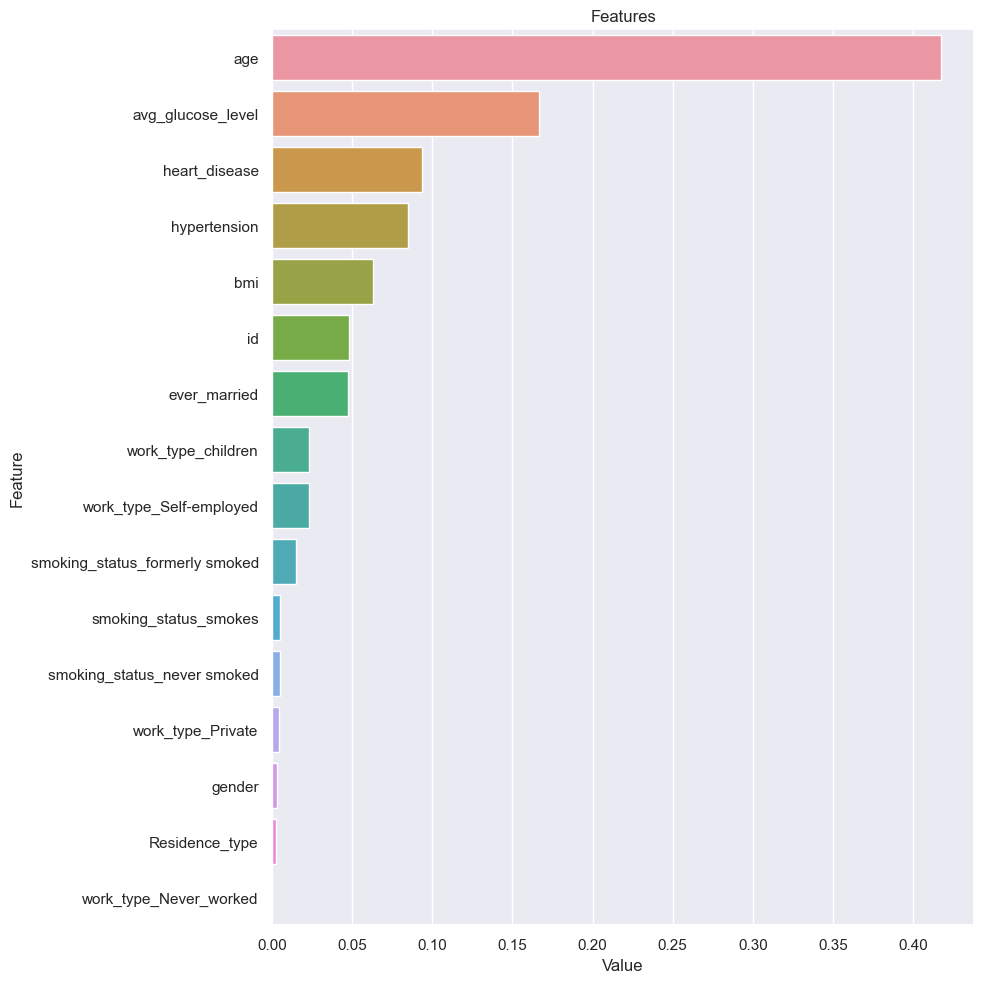

In [36]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)

In [37]:
import pickle
filename = "stroke_model.sav"
pickle.dump(rf_final,open(filename,"wb"))